In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 生成数据
np.random.seed(0)
X = np.random.randn(200, 2)
y = np.zeros(200)
for i in range(200):
    if np.sin(X[i, 0]) + np.cos(X[i, 1]) > 0:
        y[i] = 1

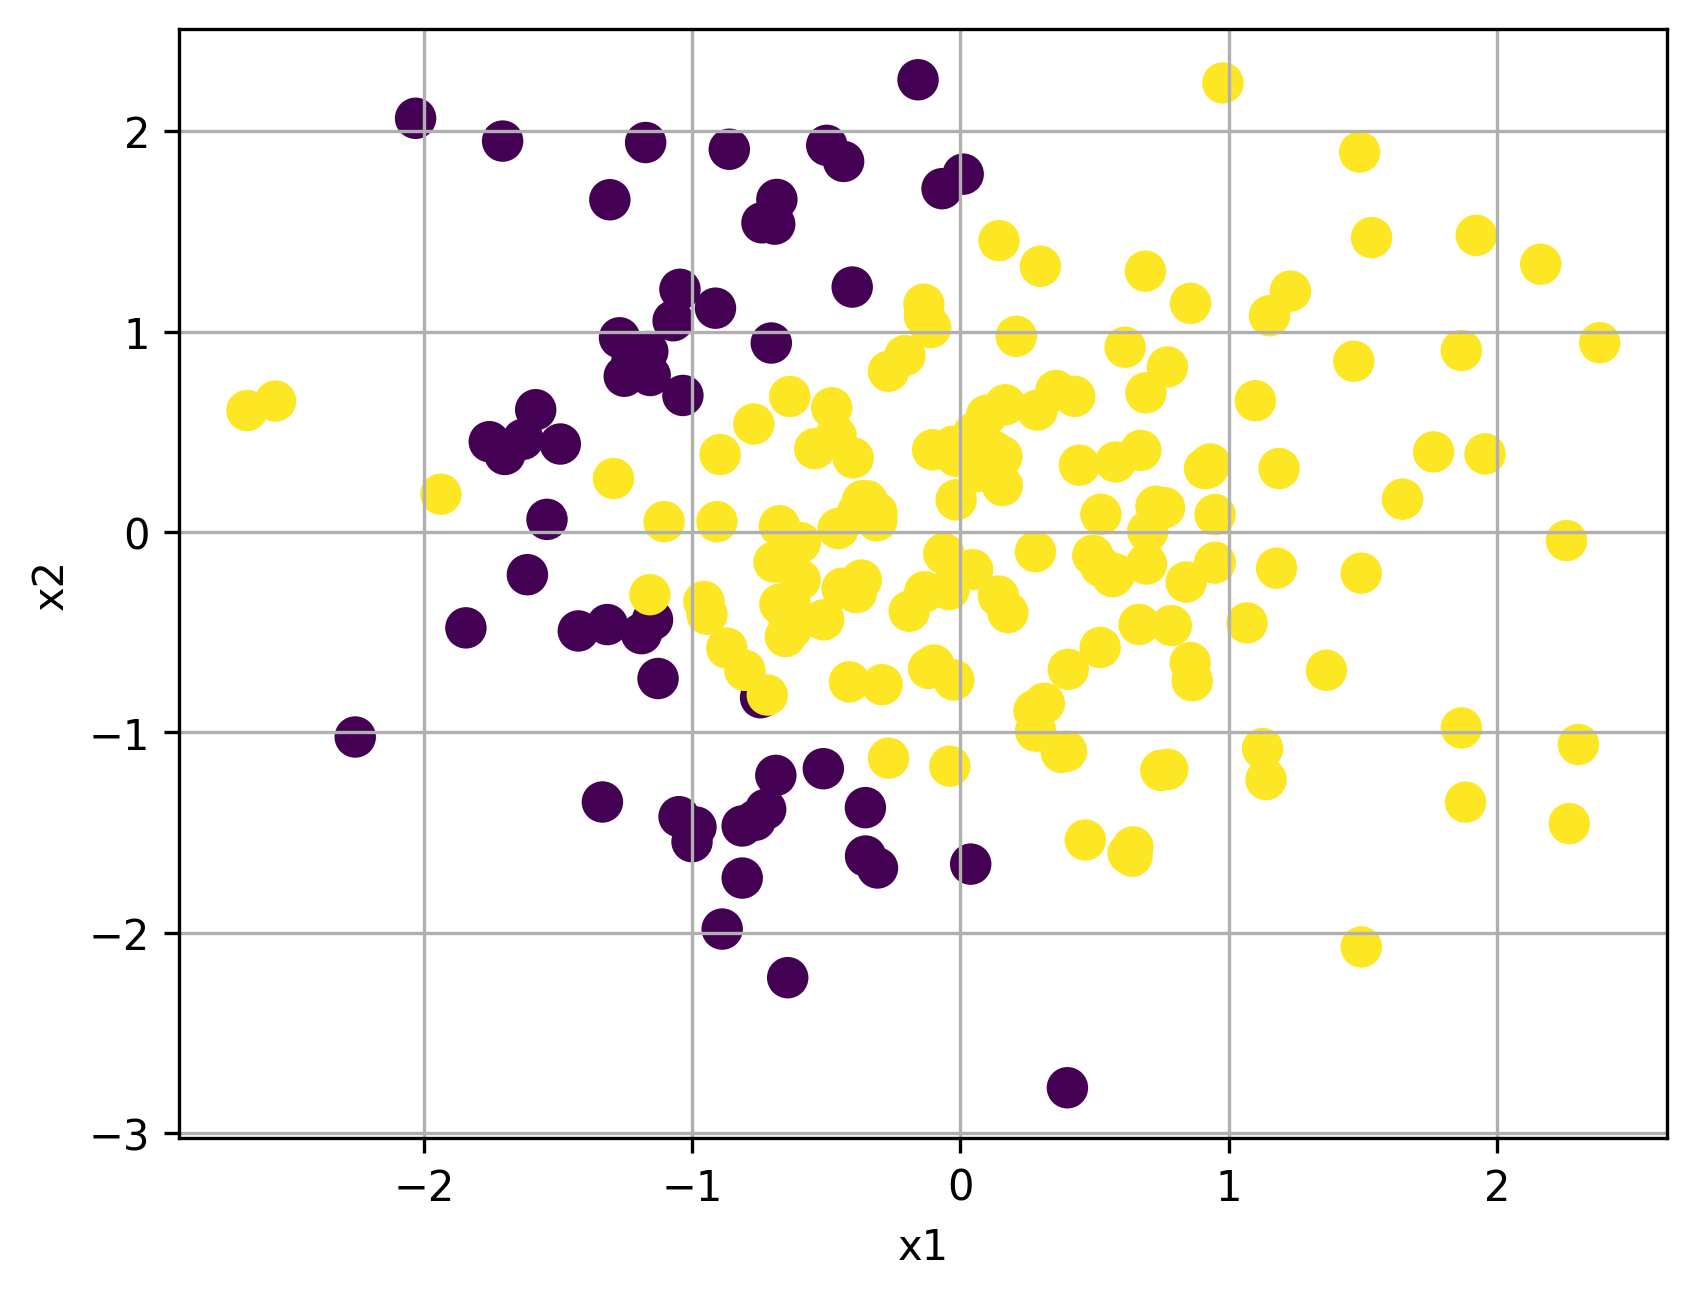

In [2]:
# 可视化数据
plt.figure(dpi=300)
plt.scatter(X[:, 0], X[:, 1], c=y, s=80)
plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')
plt.savefig('figs/4-1.png', dpi=300)
plt.show()

In [3]:
from sklearn.svm import SVC

In [4]:
# 训练 SVM 模型
clf = SVC(kernel='rbf', gamma='auto')
clf.fit(X, y)

SVC(gamma='auto')

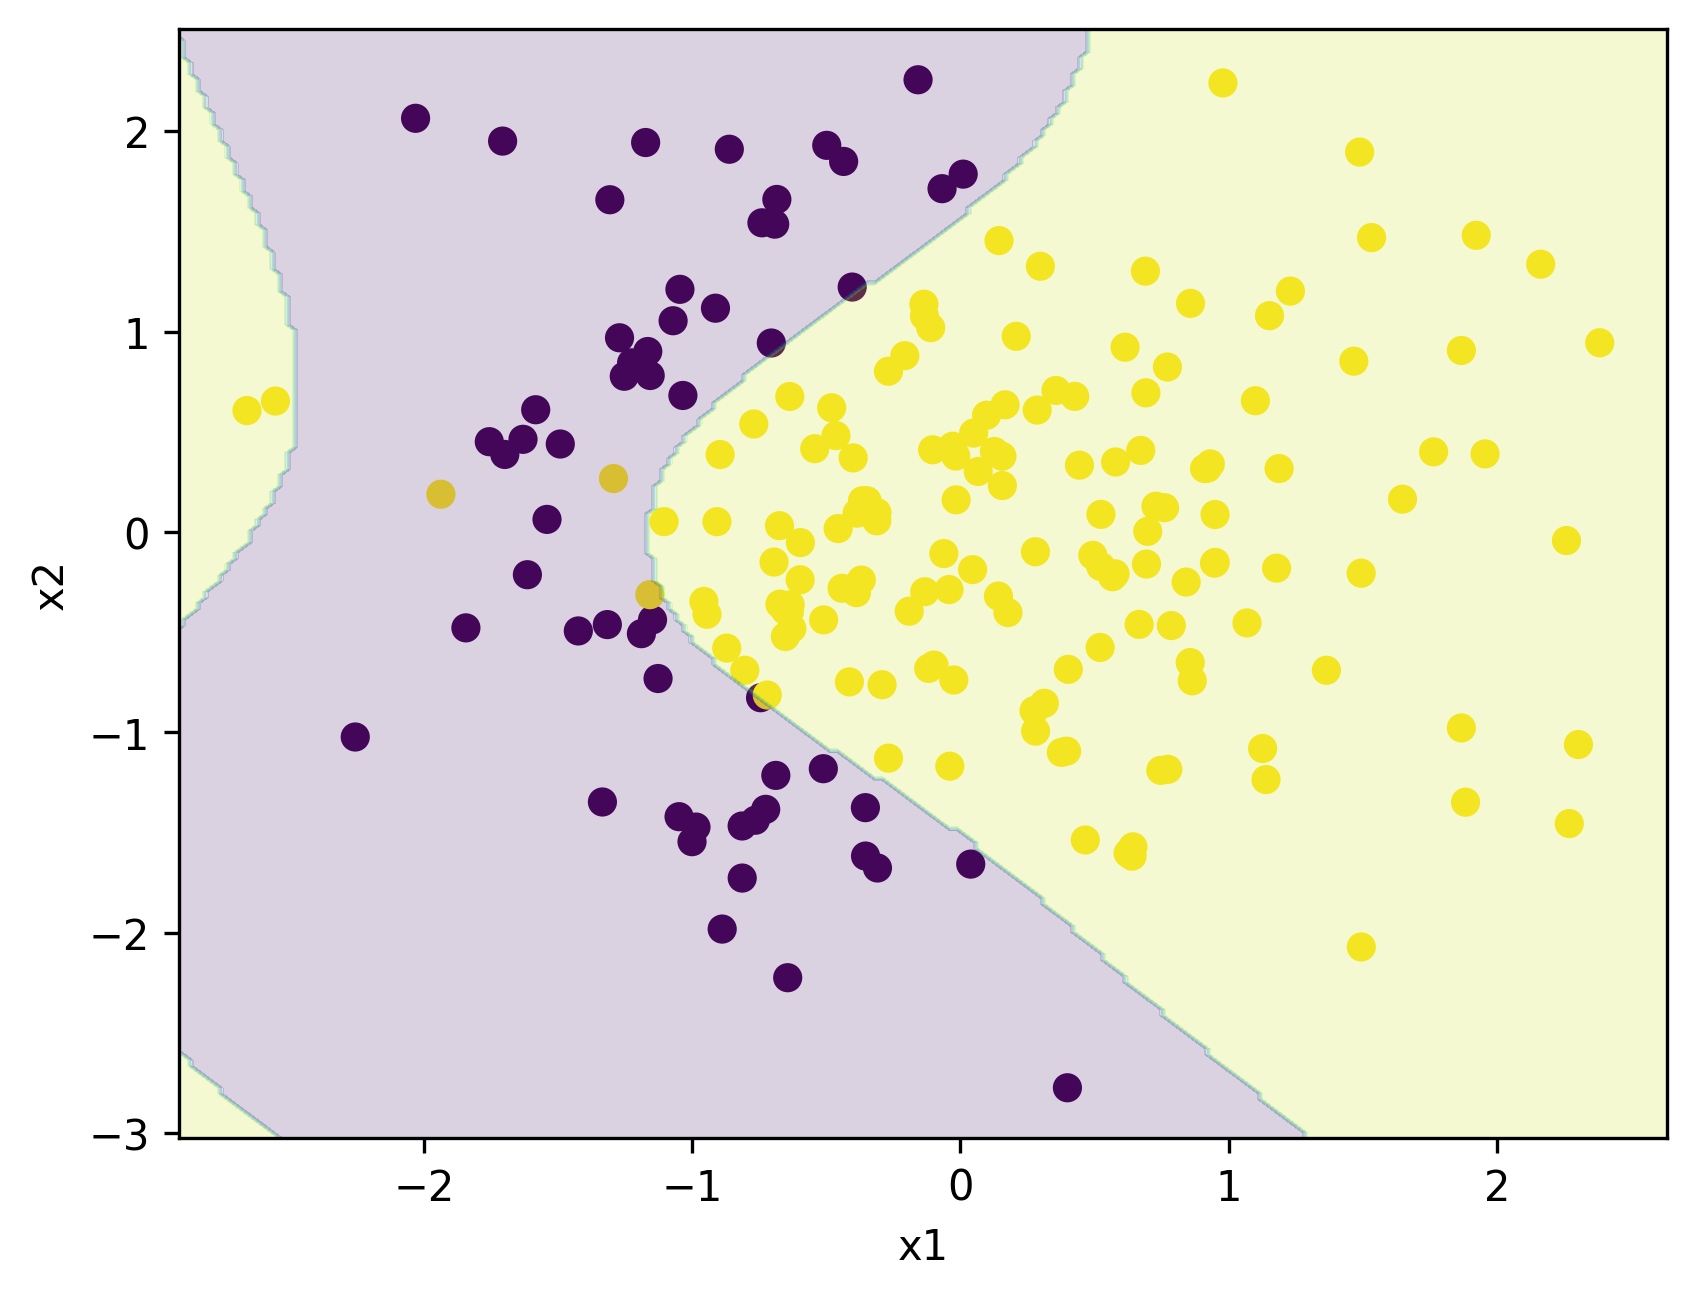

In [5]:
# 可视化决策边界
plt.figure(dpi=300)
plt.scatter(X[:, 0], X[:, 1], c=y)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 200),
                     np.linspace(ylim[0], ylim[1], 200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.savefig('figs/4-2.png', dpi=300)
plt.show()

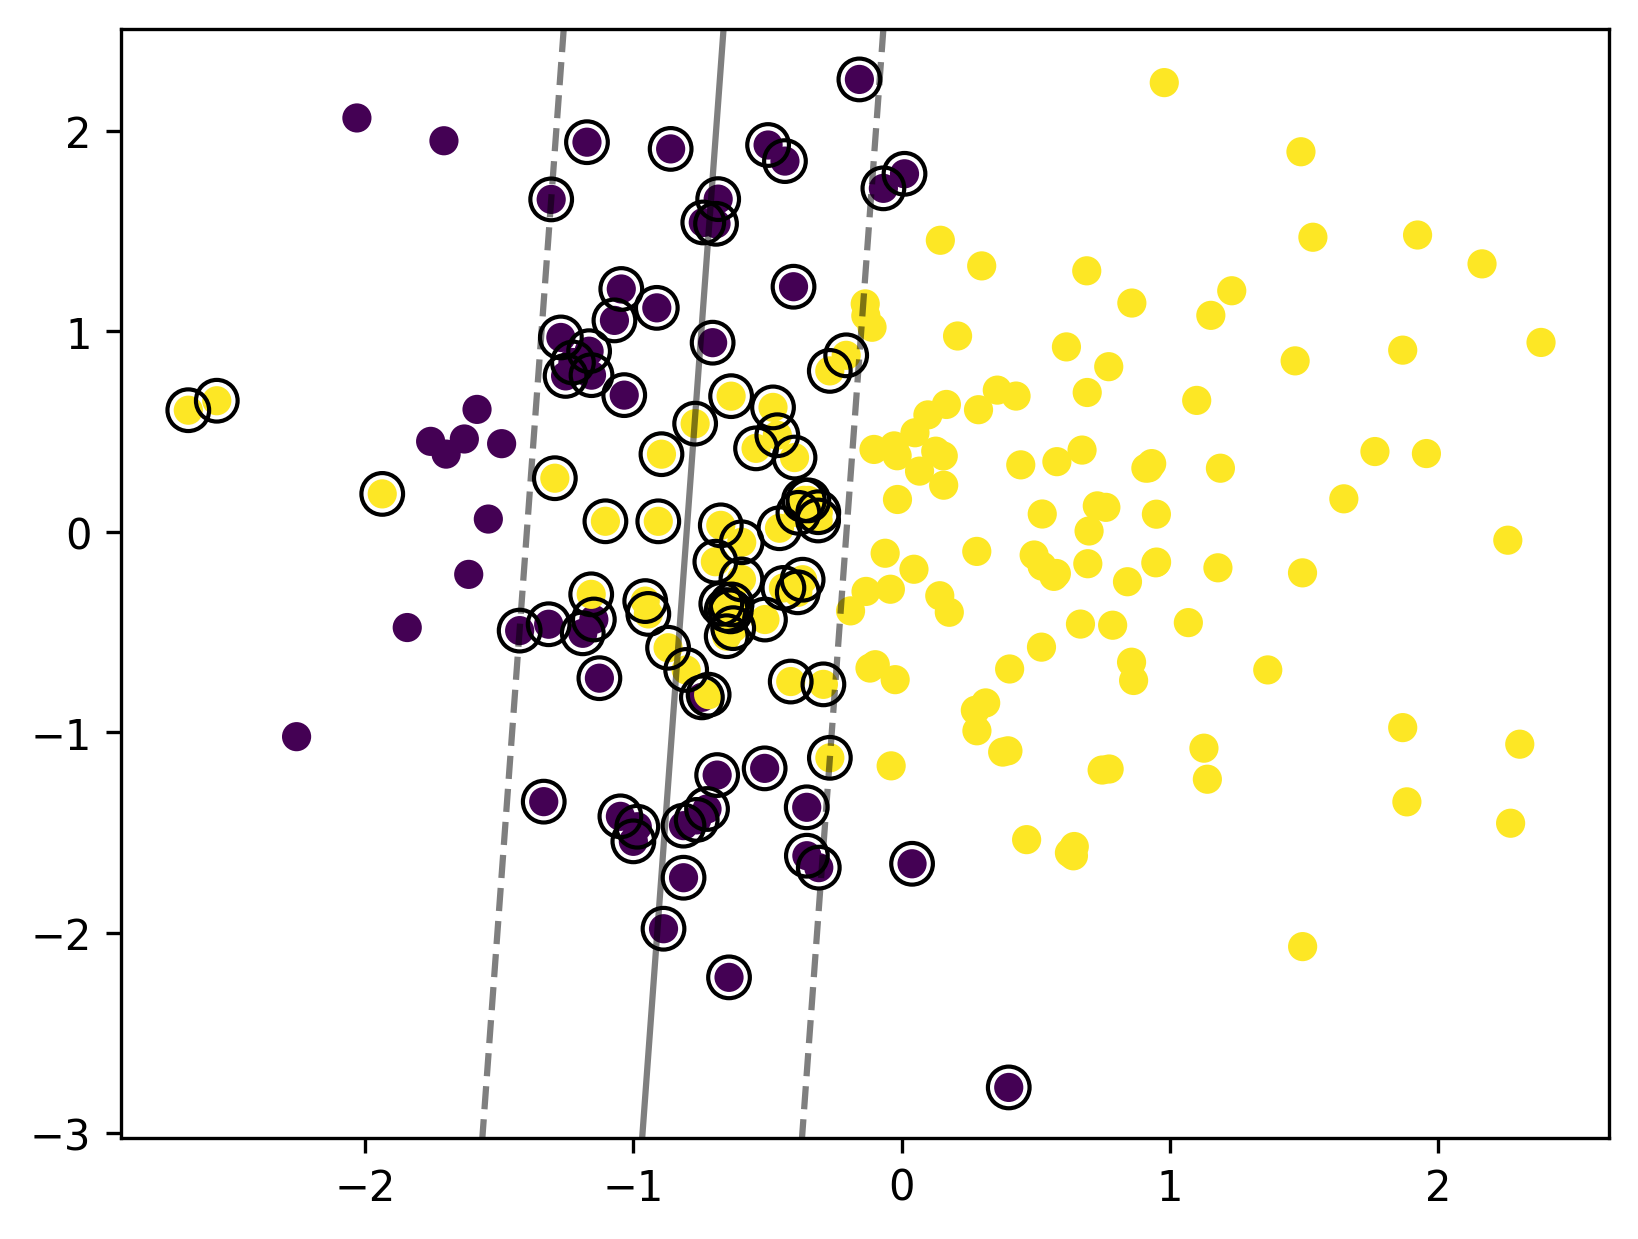

In [7]:
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn import svm  
  
# 导入必要的库  
# numpy 用于生成和处理数据  
# matplotlib.pyplot 用于绘图  
# sklearn.svm 用于构建和训练SVM模型  
  
# 生成数据  
np.random.seed(0)  # 设置随机数种子以确保结果可复现  
X = np.random.randn(200, 2)  # 生成200个二维随机点，作为特征  
y = np.zeros(200)  # 初始化标签数组，全部为0  
for i in range(200):  
    # 根据点的正弦和余弦函数的和来分配标签，如果和大于0则标签为1  
    if np.sin(X[i, 0]) + np.cos(X[i, 1]) > 0:  
        y[i] = 1  
  
# 拟合 SVM 模型  
# 使用线性SVM，C参数控制正则化强度  
model = svm.SVC(kernel='linear', C=1.0)  
model.fit(X, y)  # 训练模型  
  
# 可视化数据和分类边界  
plt.figure(dpi=300)  # 创建一个图形，设置分辨率为300dpi  
plt.scatter(X[:, 0], X[:, 1], c=y)  # 绘制数据点，根据y值的不同使用不同颜色  
  
# 获取当前坐标轴  
ax = plt.gca()  
xlim = ax.get_xlim()  # 获取x轴范围  
ylim = ax.get_ylim()  # 获取y轴范围  
  
# 创建网格来绘制决策边界  
xx = np.linspace(xlim[0], xlim[1], 30)  # 在x轴范围内生成30个点  
yy = np.linspace(ylim[0], ylim[1], 30)  # 在y轴范围内生成30个点  
XX, YY = np.meshgrid(xx, yy)  # 生成网格  
xy = np.vstack([XX.ravel(), YY.ravel()]).T  # 将网格展平并转置为二维点集  
Z = model.decision_function(xy).reshape(XX.shape)  # 计算这些点的决策函数值，并重新塑形为网格形状  
  
# 绘制分类边界和支持向量  
# 使用等高线图来绘制决策边界，-1, 0, 1分别表示不同的决策区域  
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,  
           linestyles=['--', '-', '--'])  
# 绘制支持向量，这些是在训练过程中用于定义决策边界的关键点  
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,  
           linewidth=1, facecolors='none', edgecolors='k')  
  
# 保存图像  
plt.savefig('figs/4-3.png', dpi=300)  # 将图形保存为PNG文件，设置分辨率为300dpi  
  
plt.show()  # 显示图形

In [8]:
# 定义径向基函数核函数
def rbf_kernel(X1, X2, gamma=1.0):
    """
    计算 RBF 核函数的值
    """
    K = np.zeros((X1.shape[0], X2.shape[0]))
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            diff = x1 - x2
            K[i, j] = np.exp(-gamma * np.dot(diff, diff))
    return K

# 将数据映射到高维空间
gamma = 1.0
phi_X = rbf_kernel(X, X, gamma)

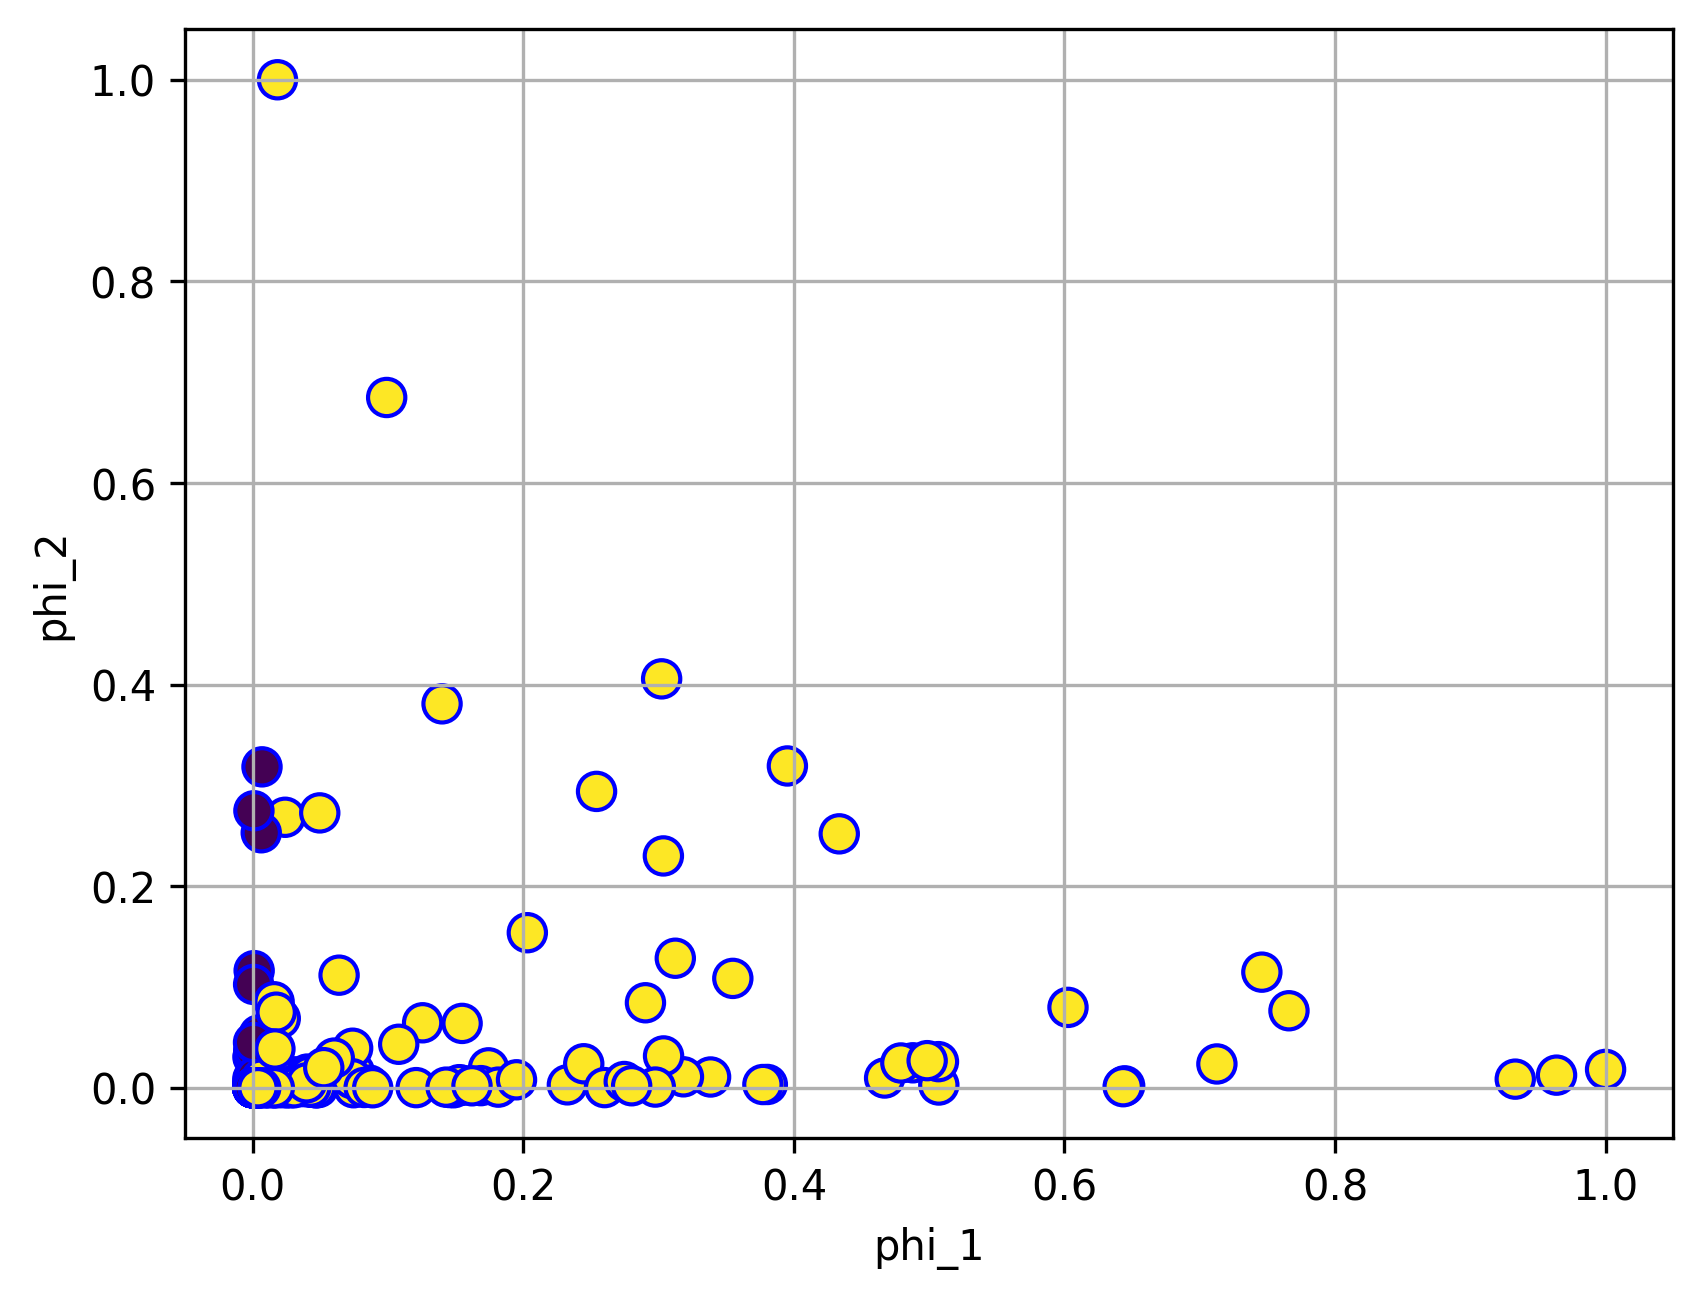

In [9]:
# 可视化映射后的数据
plt.figure(dpi=300)
plt.scatter(phi_X[:, 0], phi_X[:, 1], c=y,s=80, edgecolors='b')
plt.grid()
plt.xlabel('phi_1')
plt.ylabel('phi_2')
plt.savefig('figs/4-4.png', dpi=300)
plt.show()

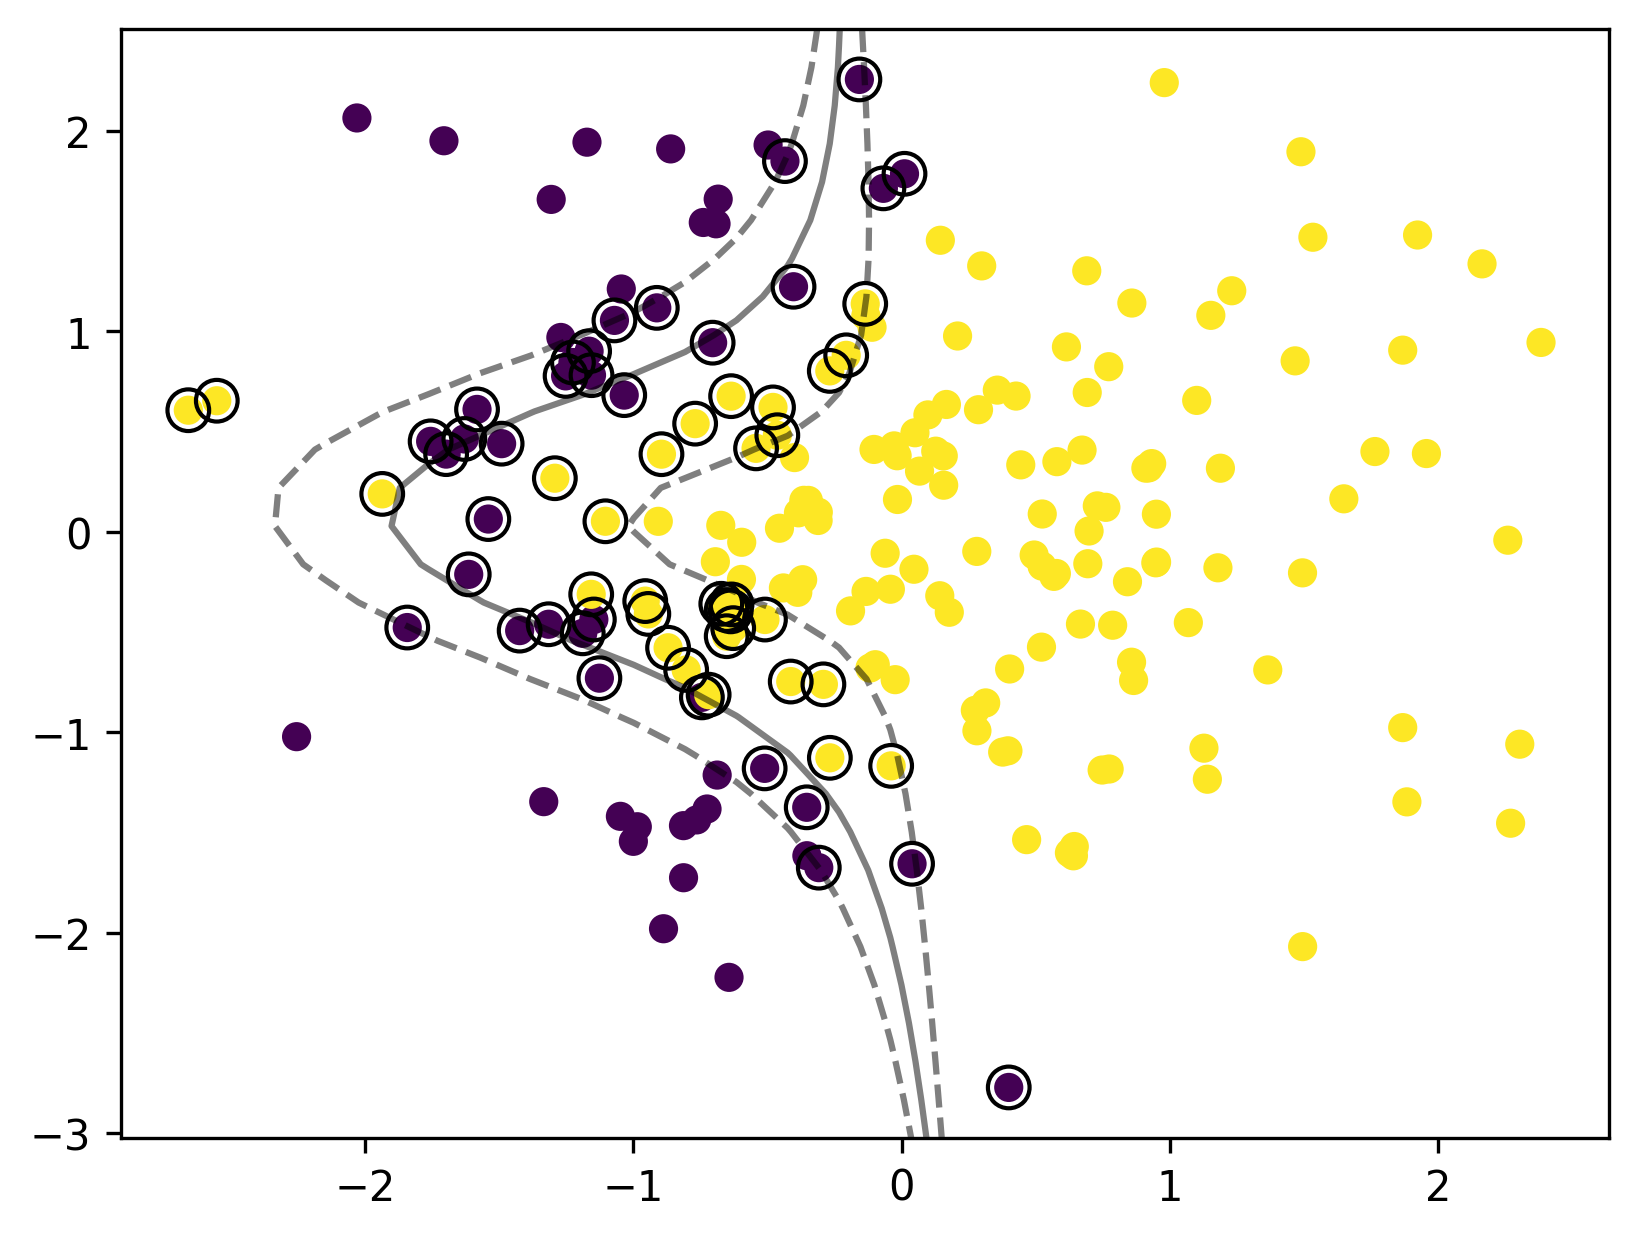

In [12]:
# 导入所需的库
import numpy as np  # 数值计算库
import matplotlib.pyplot as plt  # 数据可视化库
from sklearn import svm  # 机器学习库，用于支持向量机(SVM)

# 设置随机数种子，保证每次运行生成相同的数据
np.random.seed(0)

# 生成随机数据
X = np.random.randn(200, 2)  # 生成200个二维随机点
y = np.zeros(200)  # 初始化标签数组

# 为每个样本点分配标签
for i in range(200):
    # 如果 sin(x1) + cos(x2) > 0，则标签为1，否则为0
    if np.sin(X[i, 0]) + np.cos(X[i, 1]) > 0:
        y[i] = 1

# 创建并训练一个多项式核的支持向量机模型
model = svm.SVC(kernel='poly', C=1.0)  # kernel参数指定使用多项式核函数, C是惩罚系数
model.fit(X, y)  # 使用X和y来拟合SVM模型

# 绘制数据和分类边界
plt.figure(dpi=300)  # 创建一个新的图形窗口，设置分辨率为300dpi
plt.scatter(X[:, 0], X[:, 1], c=y)  # 绘制散点图，颜色根据y的值来决定

# 获取坐标轴的范围
ax = plt.gca()  # 获取当前坐标轴
xlim = ax.get_xlim()  # 获取x轴的范围
ylim = ax.get_ylim()  # 获取y轴的范围

# 创建网格以绘制决策边界
xx = np.linspace(xlim[0], xlim[1], 30)  # 在x轴范围内生成30个等间距点
yy = np.linspace(ylim[0], ylim[1], 30)  # 在y轴范围内生成30个等间距点
XX, YY = np.meshgrid(xx, yy)  # 生成网格坐标
xy = np.vstack([XX.ravel(), YY.ravel()]).T  # 将网格坐标转换为点的列表
Z = model.decision_function(xy).reshape(XX.shape)  # 计算决策函数值，并重塑为网格形状

# 绘制分类边界和支持向量
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,  # 绘制决策边界
           linestyles=['--', '-', '--'])  # 决策边界样式
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],  # 绘制支持向量
           s=100, linewidth=1, facecolors='none', edgecolors='k')  # 支持向量的样式
plt.show()  # 显示图形


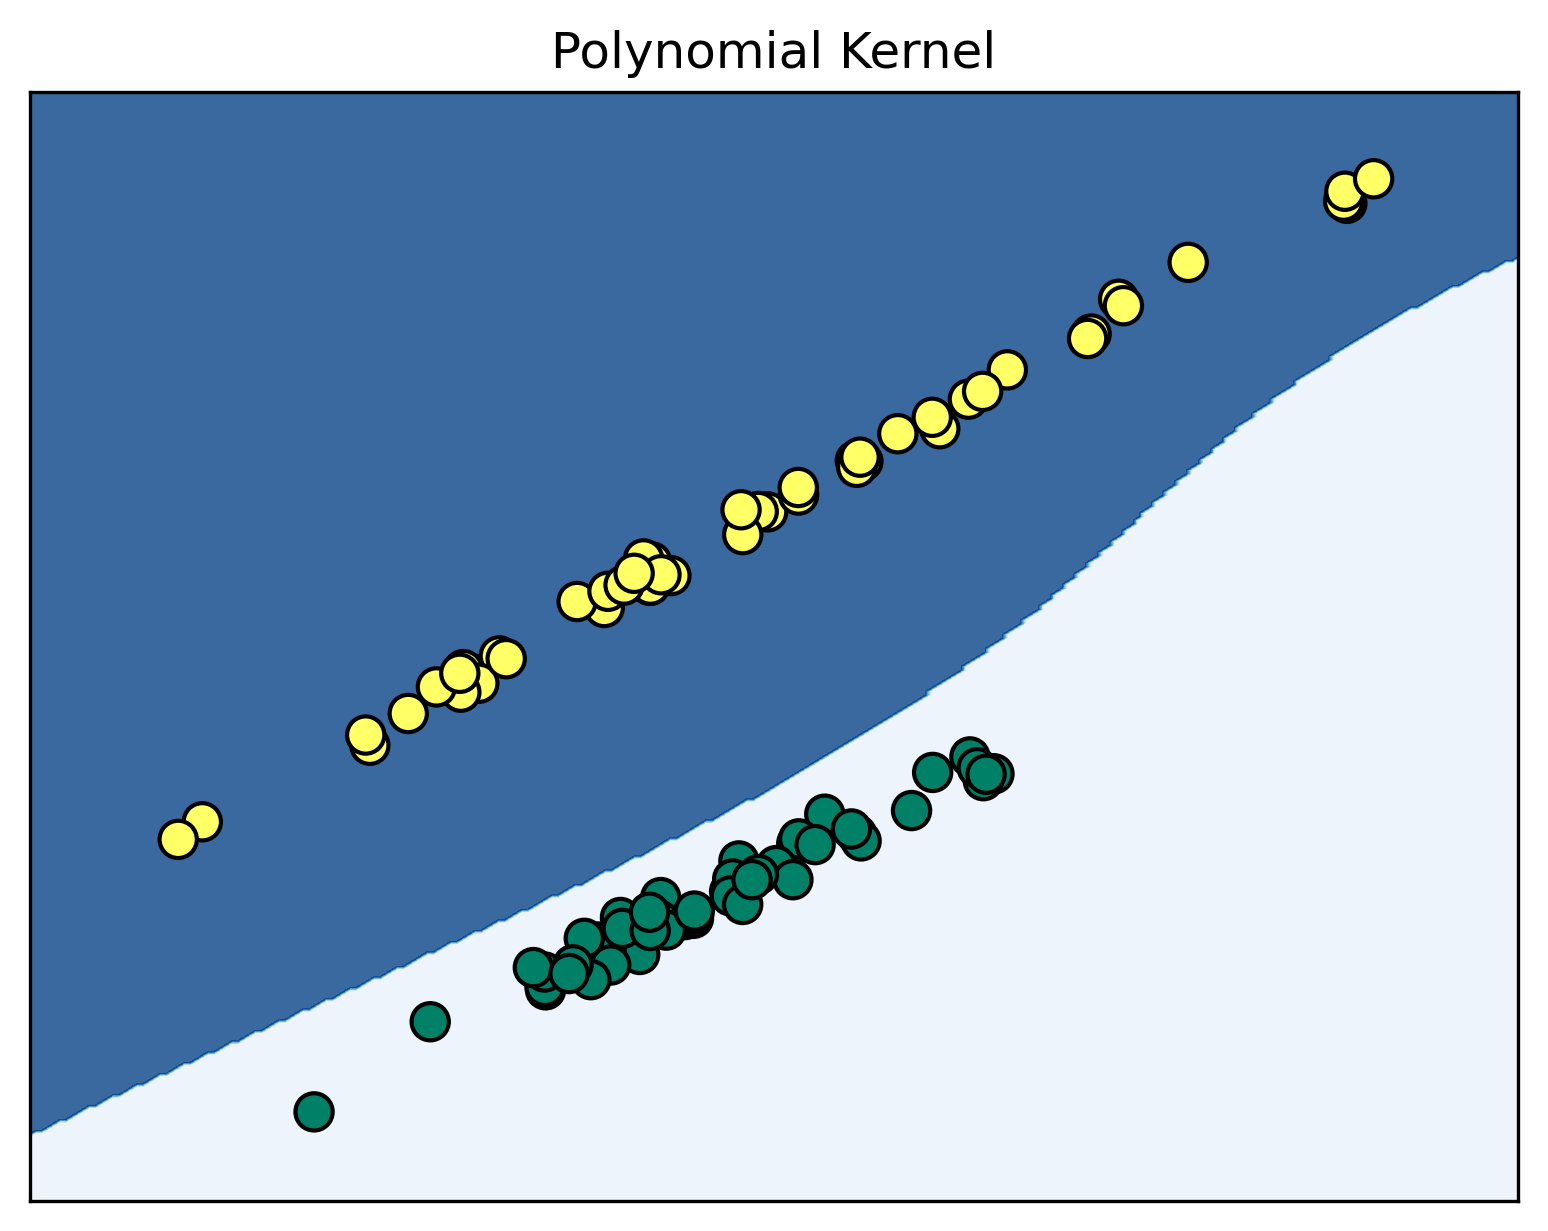

In [13]:
import numpy as np  # 导入NumPy库，用于数值计算
import matplotlib.pyplot as plt  # 导入Matplotlib库，用于数据可视化
from sklearn.datasets import make_classification  # 导入Scikit-learn库中的make_classification函数，用于生成模拟数据集
from sklearn.svm import SVC  # 导入Scikit-learn库中的SVC类，用于支持向量机分类

# 生成随机数据
X, y = make_classification(n_features=2,  # 指定数据特征的数量为2
                           n_redundant=0,  # 不包含冗余特征
                           n_informative=2,  # 指定有用特征的数量为2
                           n_clusters_per_class=1,  # 每个类别包含1个簇
                           random_state=42)  # 设置随机种子以获得可重复的结果

# 使用多项式核函数将数据映射到高维空间
svm = SVC(kernel='poly', degree=10, coef0=1)  # 创建一个多项式核的支持向量机实例，其中degree指定多项式的次数，coef0是核函数的常数项
svm.fit(X, y)  # 使用生成的数据X和对应的标签y来训练SVM模型

# 绘制决策边界
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5  # 获取第一个特征的最小和最大值，并扩展范围
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5  # 获取第二个特征的最小和最大值，并扩展范围
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))  # 创建一个网格，用于绘制决策边界
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])  # 预测网格上的每一个点的类别
Z = Z.reshape(xx.shape)  # 将预测结果重新塑形，以便与网格匹配
plt.figure(dpi=300)  # 创建一个新的图形窗口，设置分辨率为300dpi
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.8)  # 绘制填充轮廓图，显示决策区域

# 绘制数据点
plt.scatter(X[:, 0], X[:, 1], c=y,  # 绘制散点图，颜色根据y的值来决定
            s=80,  # 设置散点图中点的大小
            cmap=plt.cm.summer,  # 设置颜色映射
            edgecolors='black')  # 设置点边缘的颜色
plt.xlim(xx.min(), xx.max())  # 设置x轴的显示范围
plt.ylim(yy.min(), yy.max())  # 设置y轴的显示范围
plt.xticks(())  # 移除x轴的刻度标记
plt.yticks(())  # 移除y轴的刻度标记
plt.title('Polynomial Kernel')  # 设置图形标题
plt.savefig('figs/4-5.png', dpi=300)  # 保存图形到文件
plt.show()  # 显示图形

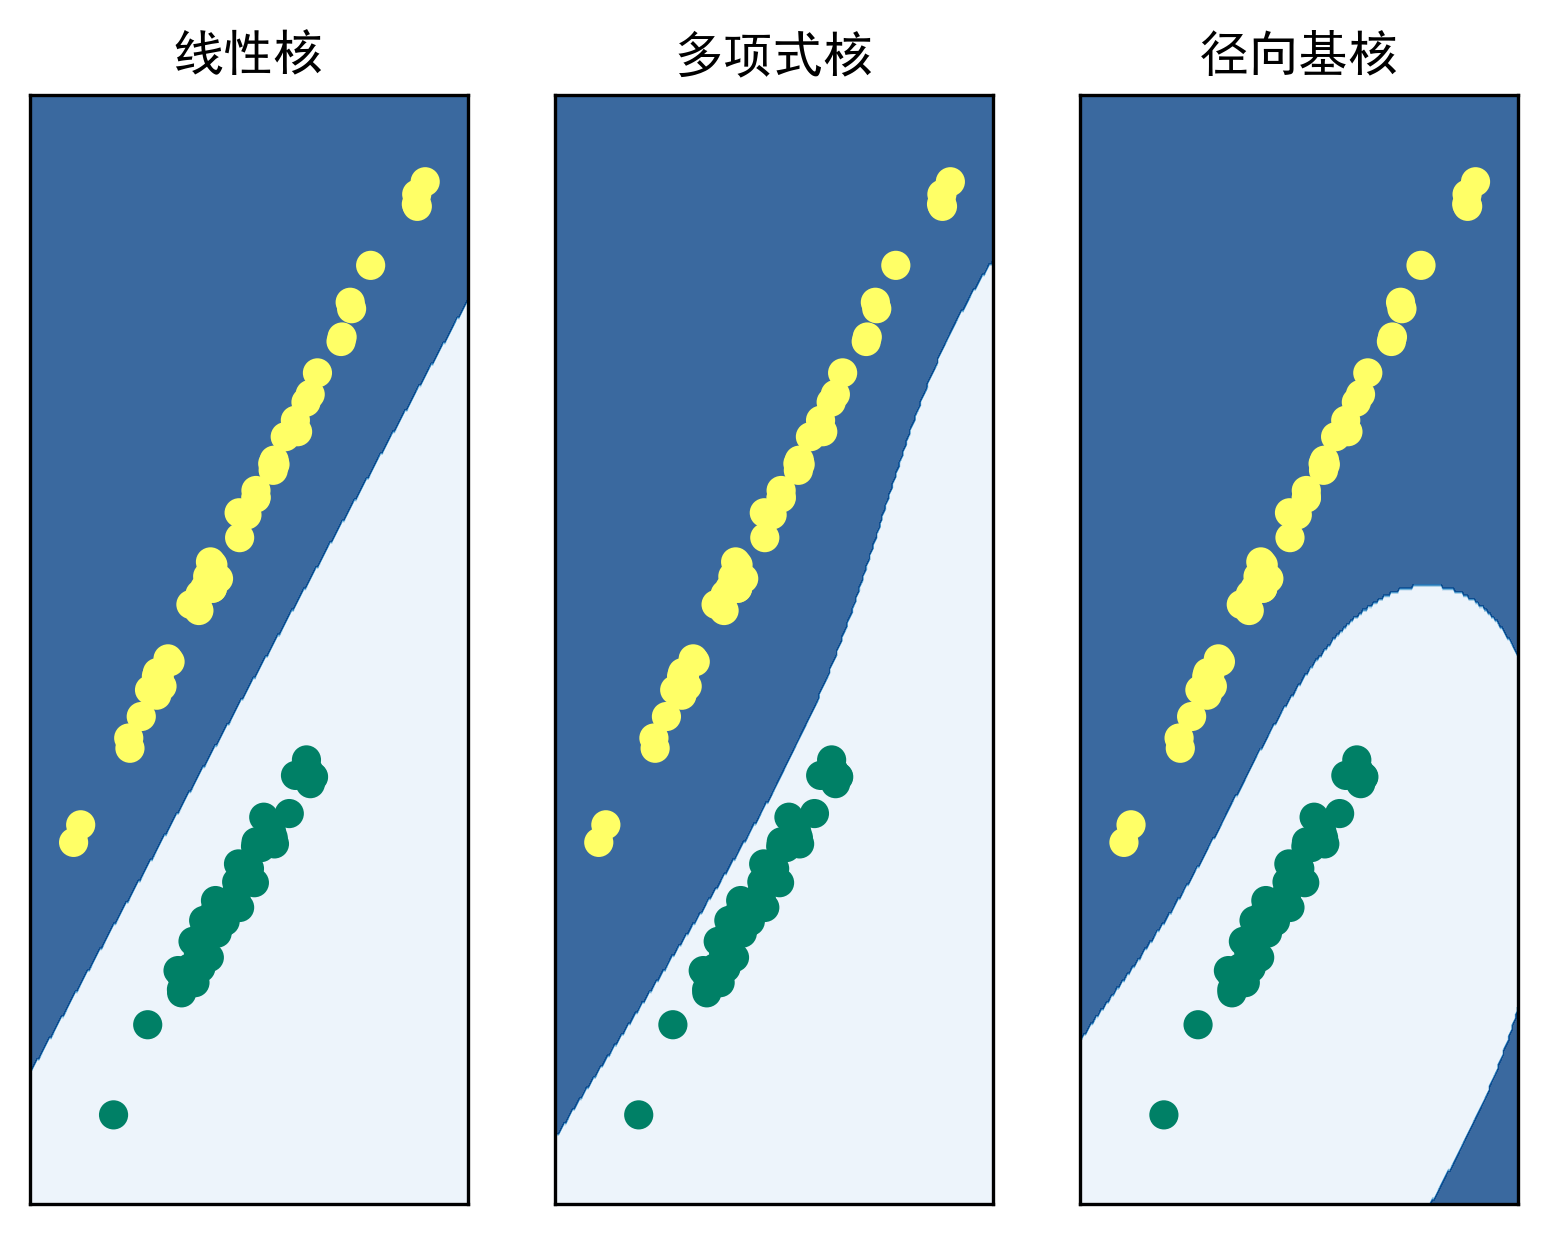

In [15]:
# 导入必要的库
import numpy as np  # 数值计算库
import matplotlib.pyplot as plt  # 数据可视化库
from sklearn.datasets import make_classification  # 生成分类数据集
from sklearn.svm import SVC  # 支持向量机分类器

# 设置中文显示
plt.rcParams['font.family'] = ['SimHei']  # 使用SimHei字体，如果您的系统中有其他中文字体，也可以使用
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 生成随机数据
# n_features=2 表示每个样本有2个特征
# n_redundant=0 表示没有冗余特征
# n_informative=2 表示所有特征都是有用的
# n_clusters_per_class=1 表示每个类别只有一个聚类中心
# random_state=42 设置随机种子以保证每次运行结果一致
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, random_state=42)

# 使用线性核函数创建支持向量机模型
# kernel='linear' 表示使用线性核函数
svm_linear = SVC(kernel='linear')
# 训练模型
svm_linear.fit(X, y)

# 使用多项式核函数创建支持向量机模型
# kernel='poly' 表示使用多项式核函数
# degree=10 表示多项式的次数
# coef0=1 表示多项式核函数中的常数项系数
svm_poly = SVC(kernel='poly', degree=10, coef0=1)
# 训练模型
svm_poly.fit(X, y)

# 使用径向基核函数创建支持向量机模型
# kernel='rbf' 表示使用径向基核函数
svm_rbf = SVC(kernel='rbf')
# 训练模型
svm_rbf.fit(X, y)

# 创建绘图区域
fig, axes = plt.subplots(nrows=1, ncols=3, dpi=300)  # 3个子图，每张图的分辨率设为300dpi

# 遍历每一个模型并绘制其决策边界
for ax, svm, title in zip(axes, [svm_linear, svm_poly, svm_rbf], ['线性核', '多项式核', '径向基核']):
    # 计算绘图范围
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5  # x轴范围
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5  # y轴范围
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))  # 创建网格
    # 在网格上的每一点预测类别
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])  # ravel() 将矩阵展平
    Z = Z.reshape(xx.shape)  # 将预测结果重塑成网格形状
    # 绘制决策边界
    ax.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.8)  # 决策边界的颜色填充
    # 绘制数据点
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.summer)  # 数据点的颜色根据类别
    # 设置坐标轴范围
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    # 移除坐标轴刻度
    ax.set_xticks(())
    ax.set_yticks(())
    # 设置标题
    ax.set_title(title)

# 保存图像
plt.savefig('figs/4-6.png', dpi=300)
# 显示图像
plt.show()

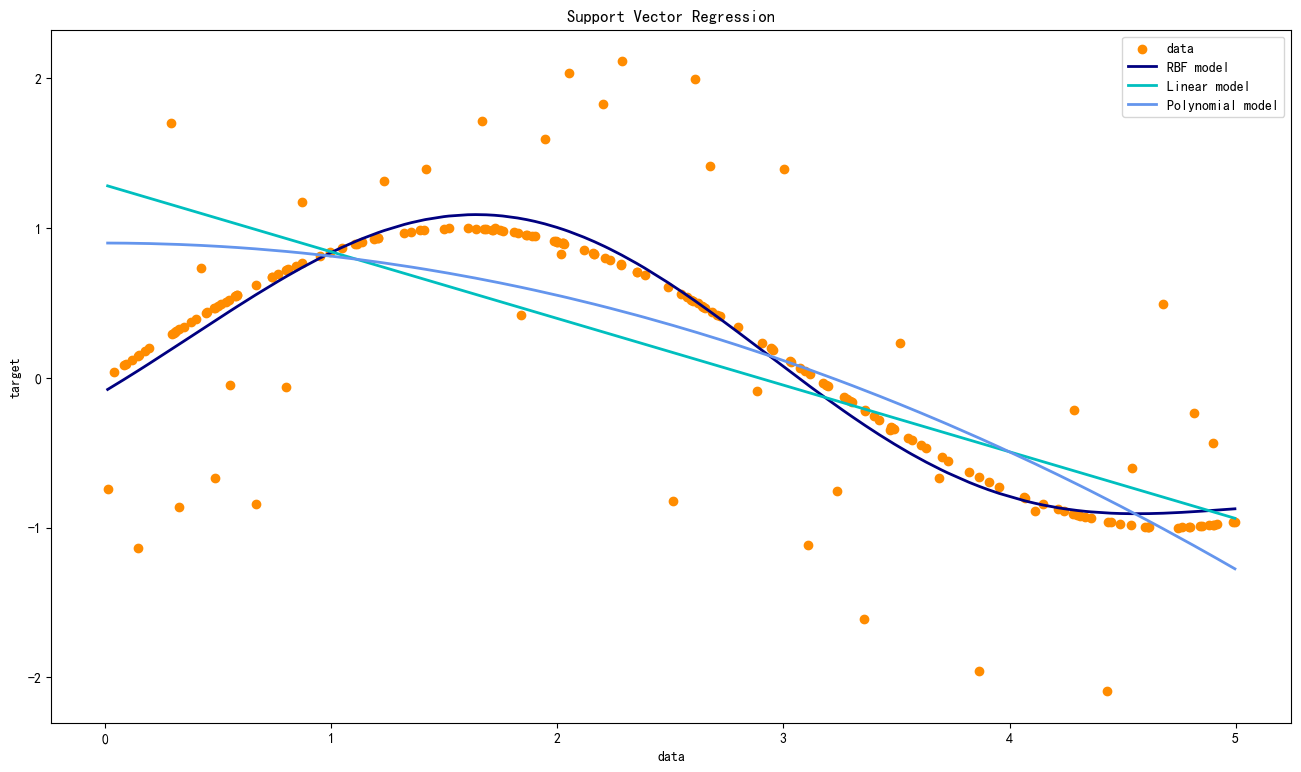

In [16]:
# 导入所需库
import numpy as np            # 数值计算库
import matplotlib.pyplot as plt  # 数据可视化库
from sklearn.svm import SVR   # 从scikit-learn导入支持向量机回归模型

# 生成一些带有噪声的数据
X = np.sort(5 * np.random.rand(200, 1), axis=0)  # 生成200个随机数，范围在0到5之间，并按升序排列
y = np.sin(X).ravel()  # 计算X的正弦值，并将结果转换为一维数组
y[::5] += 3 * (0.5 - np.random.rand(40))  # 每隔5个点增加一些噪声

# 定义和训练支持向量机回归模型
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)  # RBF核函数的支持向量机回归模型
svr_lin = SVR(kernel='linear', C=1e3)  # 线性核函数的支持向量机回归模型
svr_poly = SVR(kernel='poly', C=1e3, degree=2)  # 多项式核函数的支持向量机回归模型，degree指定多项式的次数

# 训练模型并进行预测
y_rbf = svr_rbf.fit(X, y).predict(X)  # 使用RBF模型对X进行拟合，并预测X
y_lin = svr_lin.fit(X, y).predict(X)  # 使用线性模型对X进行拟合，并预测X
y_poly = svr_poly.fit(X, y).predict(X)  # 使用多项式模型对X进行拟合，并预测X

# 绘制结果
lw = 2  # 线宽
plt.figure(figsize=(16, 9))  # 设置画布大小
plt.scatter(X, y, color='darkorange', label='data')  # 绘制散点图，表示原始数据
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')  # 绘制RBF模型的预测曲线
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')  # 绘制线性模型的预测曲线
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')  # 绘制多项式模型的预测曲线
plt.xlabel('data')  # 设置x轴标签
plt.ylabel('target')  # 设置y轴标签
plt.title('Support Vector Regression')  # 设置图表标题
plt.legend()  # 显示图例
plt.show()  # 展示图表


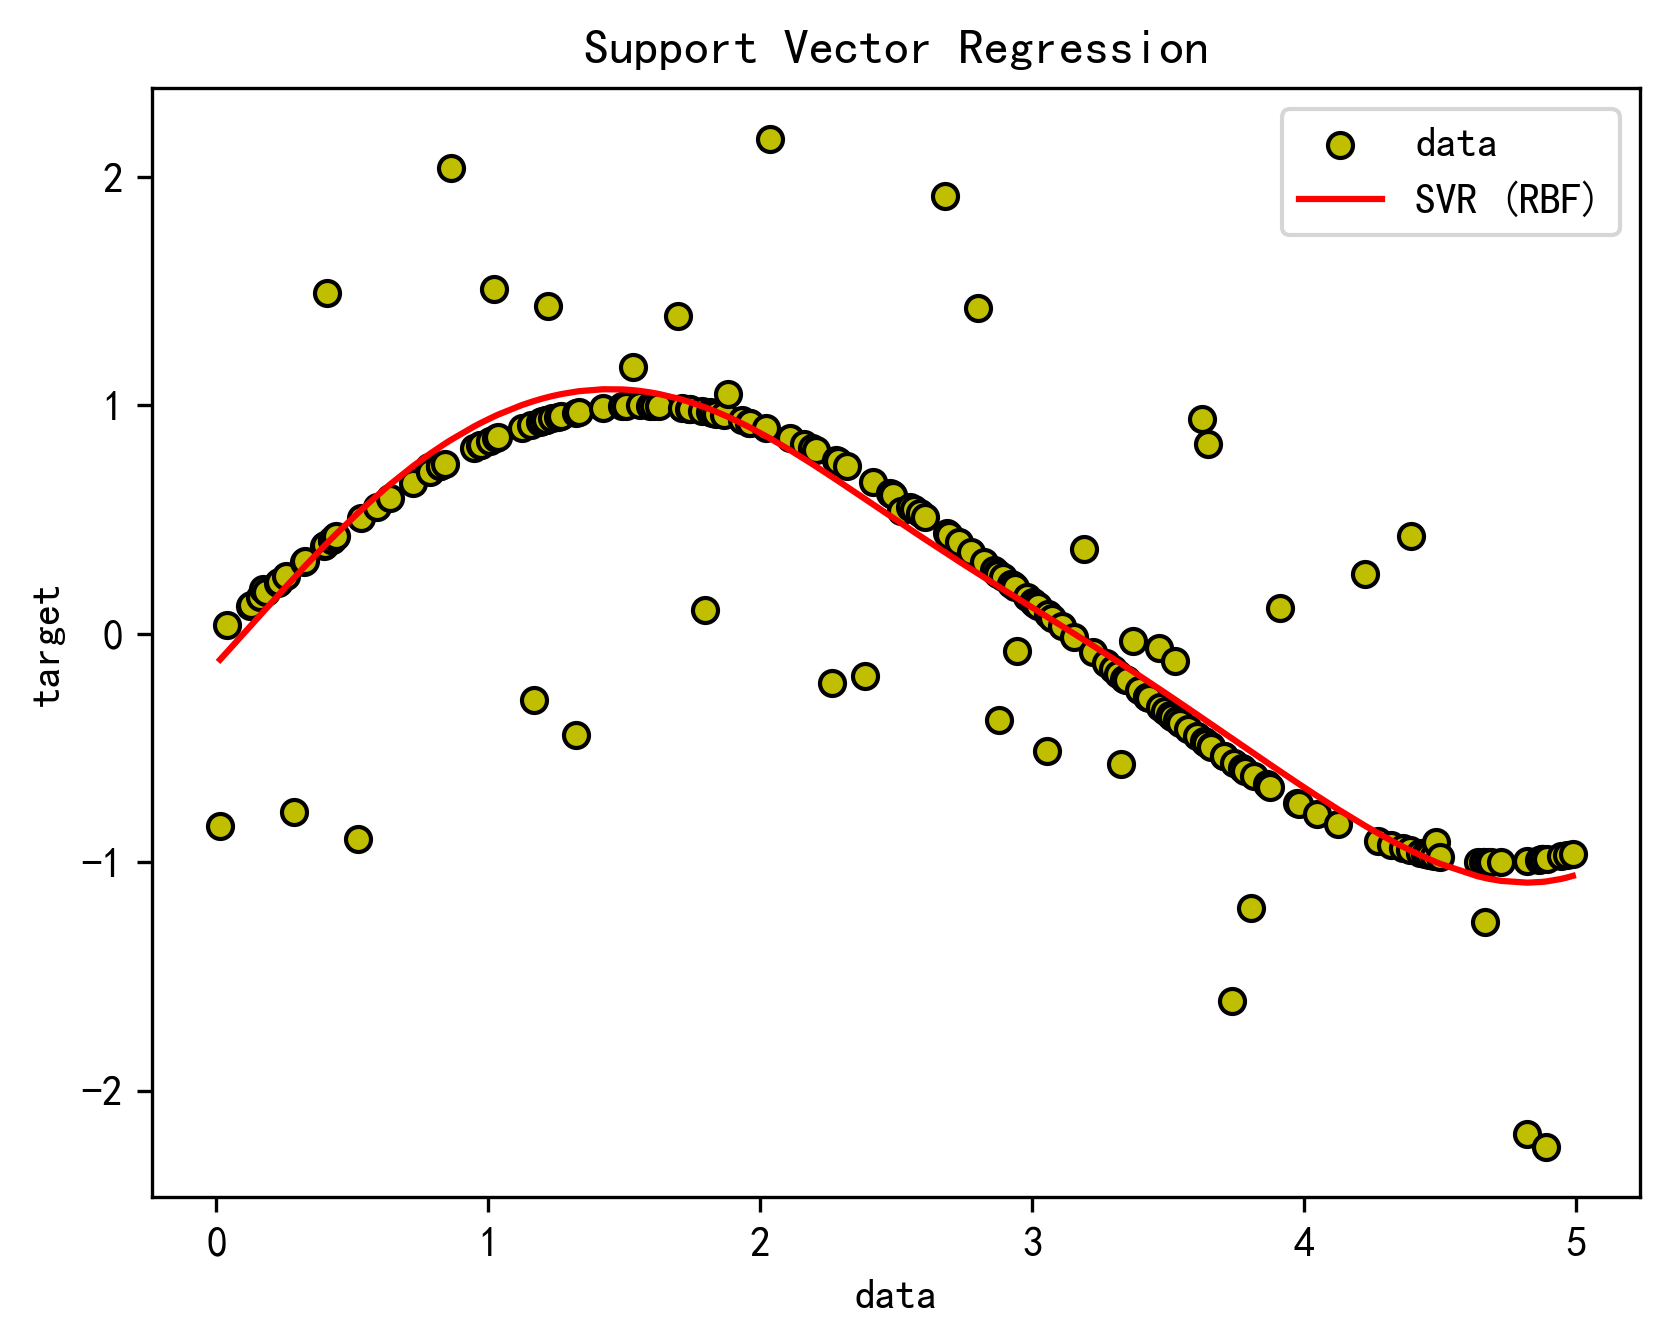

In [17]:
# 导入库
import numpy as np               # 数值计算库
import matplotlib.pyplot as plt  # 数据可视化库
from sklearn.svm import SVR      # 从scikit-learn导入支持向量机回归模型

# 生成带有噪声的数据
X = np.sort(5 * np.random.rand(200, 1), axis=0)  # 生成200个随机数，范围在0到5之间，并按升序排列
y = np.sin(X).ravel()  # 对X中的每个值计算正弦值，并展平为一维数组
y[::5] += 3 * (0.5 - np.random.rand(40))  # 每隔5个点增加一些噪声

# 创建和支持向量机回归模型
svr = SVR(kernel='rbf', C=100, gamma='scale', epsilon=.1)  # 创建一个支持向量机回归模型
# 参数解释:
# kernel='rbf' - 使用径向基函数作为核函数
# C=100 - 设置惩罚参数C的值
# gamma='scale' - 自动确定gamma值，通常是1/(n_features*X.var())
# epsilon=.1 - 设置epsilon-SVR模型的epsilon值

# 拟合数据并预测
y_fit = svr.fit(X, y).predict(X)  # 使用模型对X进行拟合，并对X进行预测

# 可视化结果
plt.figure(dpi=300)  # 设置绘图的分辨率
plt.scatter(X, y, c='y', label='data', edgecolors='k')  # 绘制散点图，表示原始数据
plt.plot(X, y_fit, c='r', label='SVR (RBF)')  # 绘制SVR模型的预测曲线
plt.xlabel('data')  # 设置x轴标签
plt.ylabel('target')  # 设置y轴标签
plt.title('Support Vector Regression')  # 设置图表标题
plt.legend()  # 显示图例
plt.savefig('figs/4-7.png', dpi=300)  # 保存图表为PNG文件
plt.show()  # 展示图表


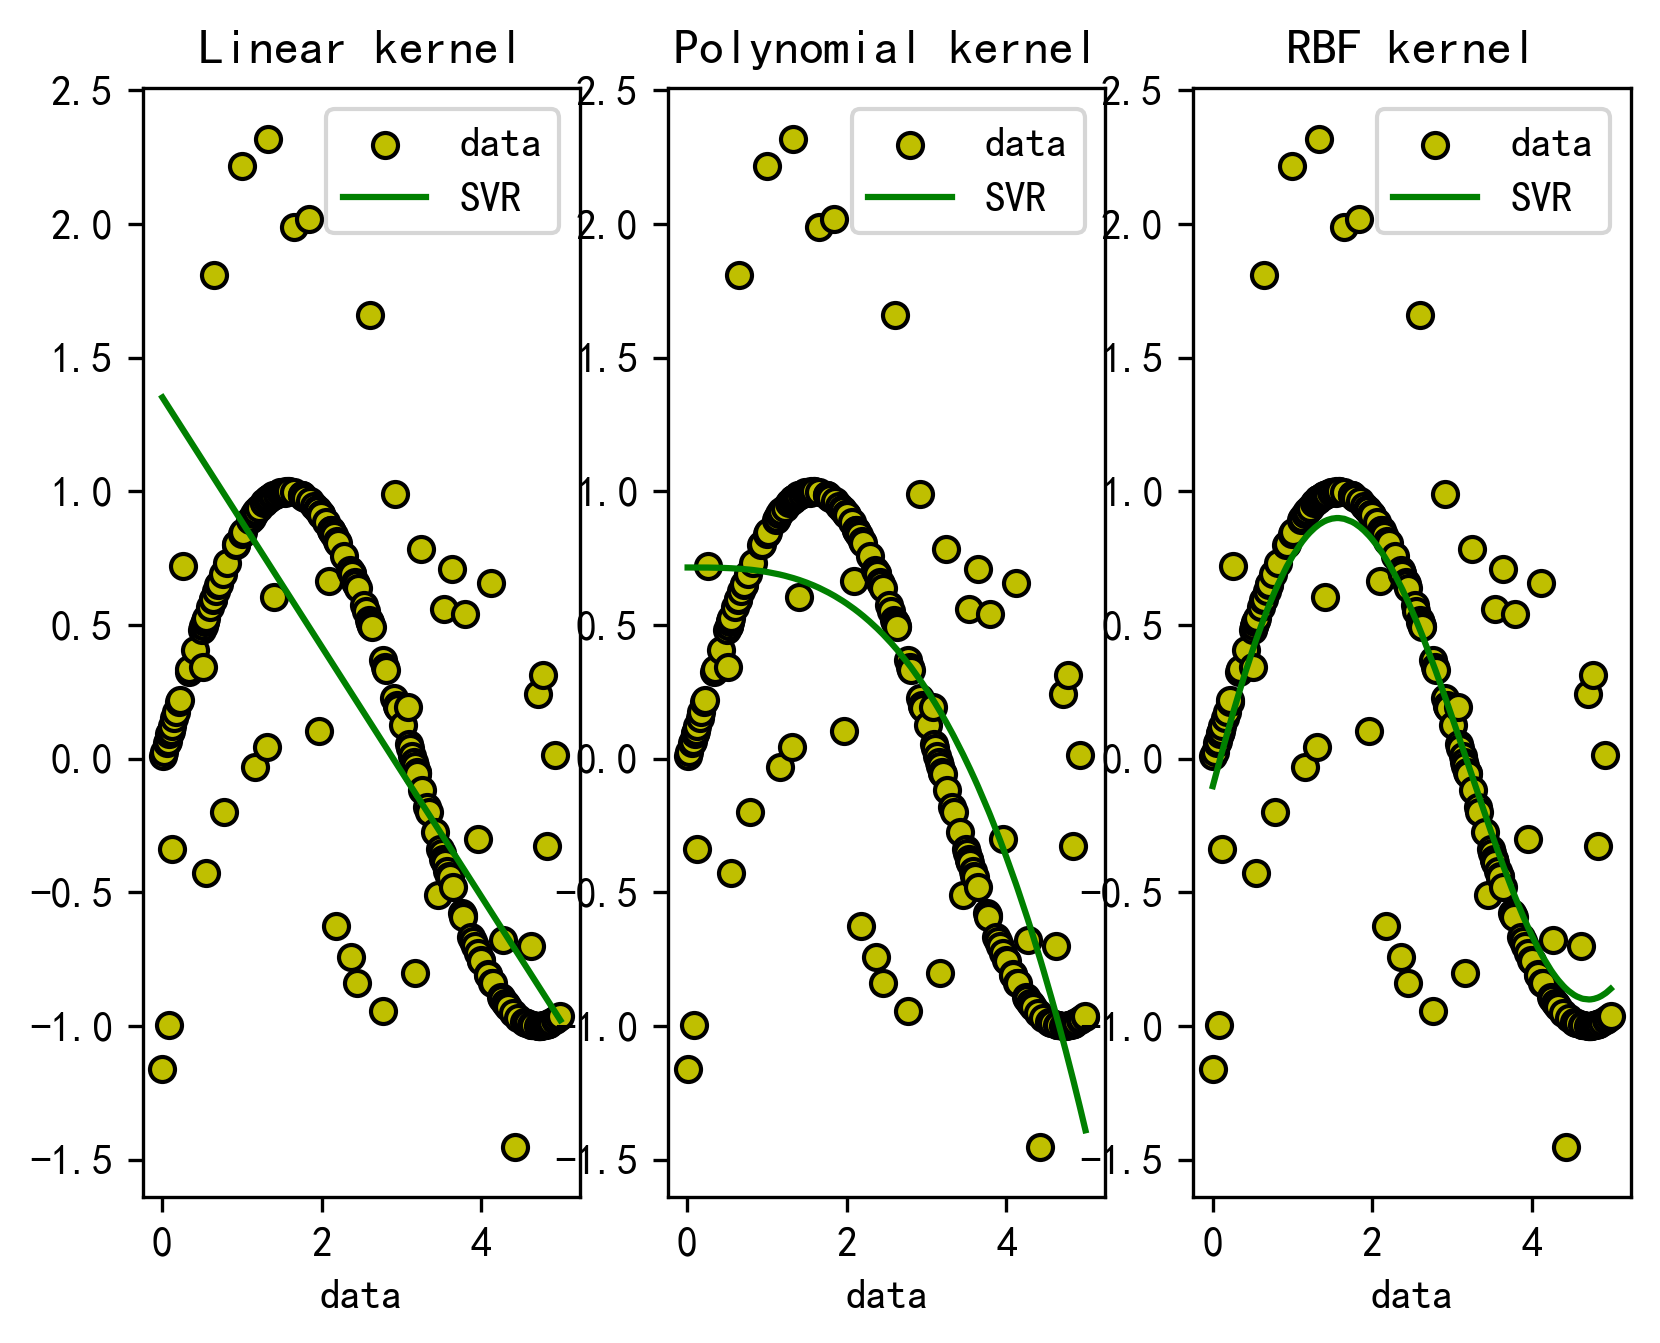

In [18]:
# 导入所需的库
import numpy as np  # 数值计算库
import matplotlib.pyplot as plt  # 数据可视化库
from sklearn.svm import SVR  # 支持向量机回归模型

# 生成一些带有噪声的数据
X = np.sort(5 * np.random.rand(200, 1), axis=0)  # 生成200个随机数，范围在0到5之间，并按升序排列
y = np.sin(X).ravel()  # 对X中的每个值计算正弦值，并展平为一维数组
y[::5] += 3 * (0.5 - np.random.rand(40))  # 每隔5个点增加一些噪声

# 创建支持向量机回归模型
svrs = [  # 创建三个不同的SVR模型
    SVR(kernel='linear', C=100),  # 线性核函数的SVR模型，C参数控制惩罚系数
    SVR(kernel='poly', C=100, degree=3),  # 多项式核函数的SVR模型，degree参数指定多项式的阶数
    SVR(kernel='rbf', C=100, gamma=0.1)  # RBF核函数的SVR模型，gamma参数控制核函数的宽度
]
kernel_labels = ['Linear', 'Polynomial', 'RBF']  # 模型的核函数标签

# 训练并绘制支持向量机回归模型
fig, axes = plt.subplots(nrows=1, ncols=len(svrs), dpi=300)  # 创建子图，dpi设置为300以提高清晰度
for idx, svr in enumerate(svrs):  # 遍历每一个SVR模型
    y_fit = svr.fit(X, y).predict(X)  # 使用当前模型拟合数据并进行预测
    axes[idx].scatter(X, y, c='y', label='data', edgecolor='k')  # 绘制原始数据点
    axes[idx].plot(X, y_fit, c='g', label='SVR')  # 绘制SVR模型的预测曲线
    axes[idx].set_xlabel('data')  # 设置x轴标签
    #axes[idx].set_ylabel('target')  # 设置y轴标签
    axes[idx].set_title(kernel_labels[idx] + ' kernel')  # 设置标题
    axes[idx].legend()  # 显示图例
plt.savefig('figs/4-8.png', dpi=300)  # 保存图像
plt.show()  # 显示图像


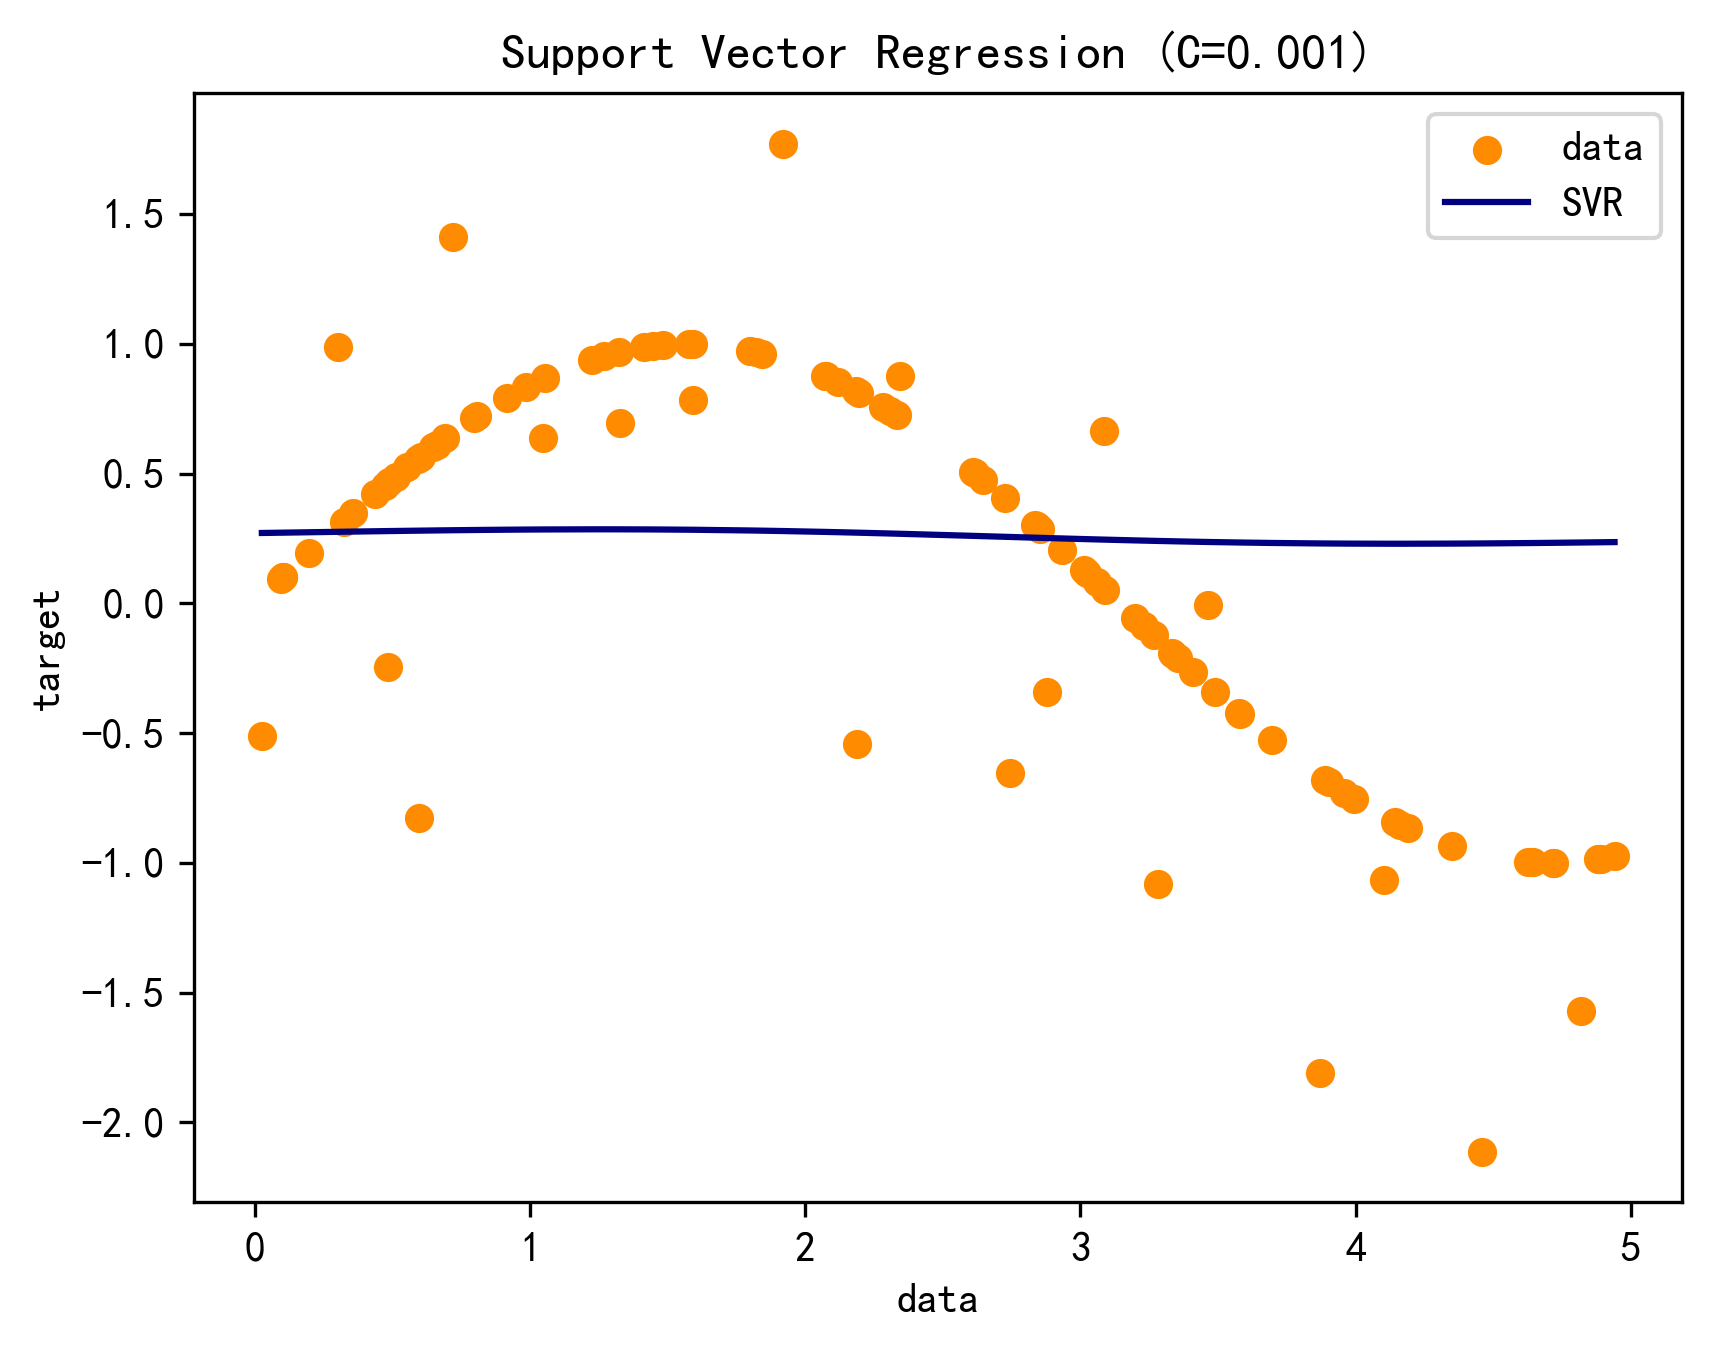

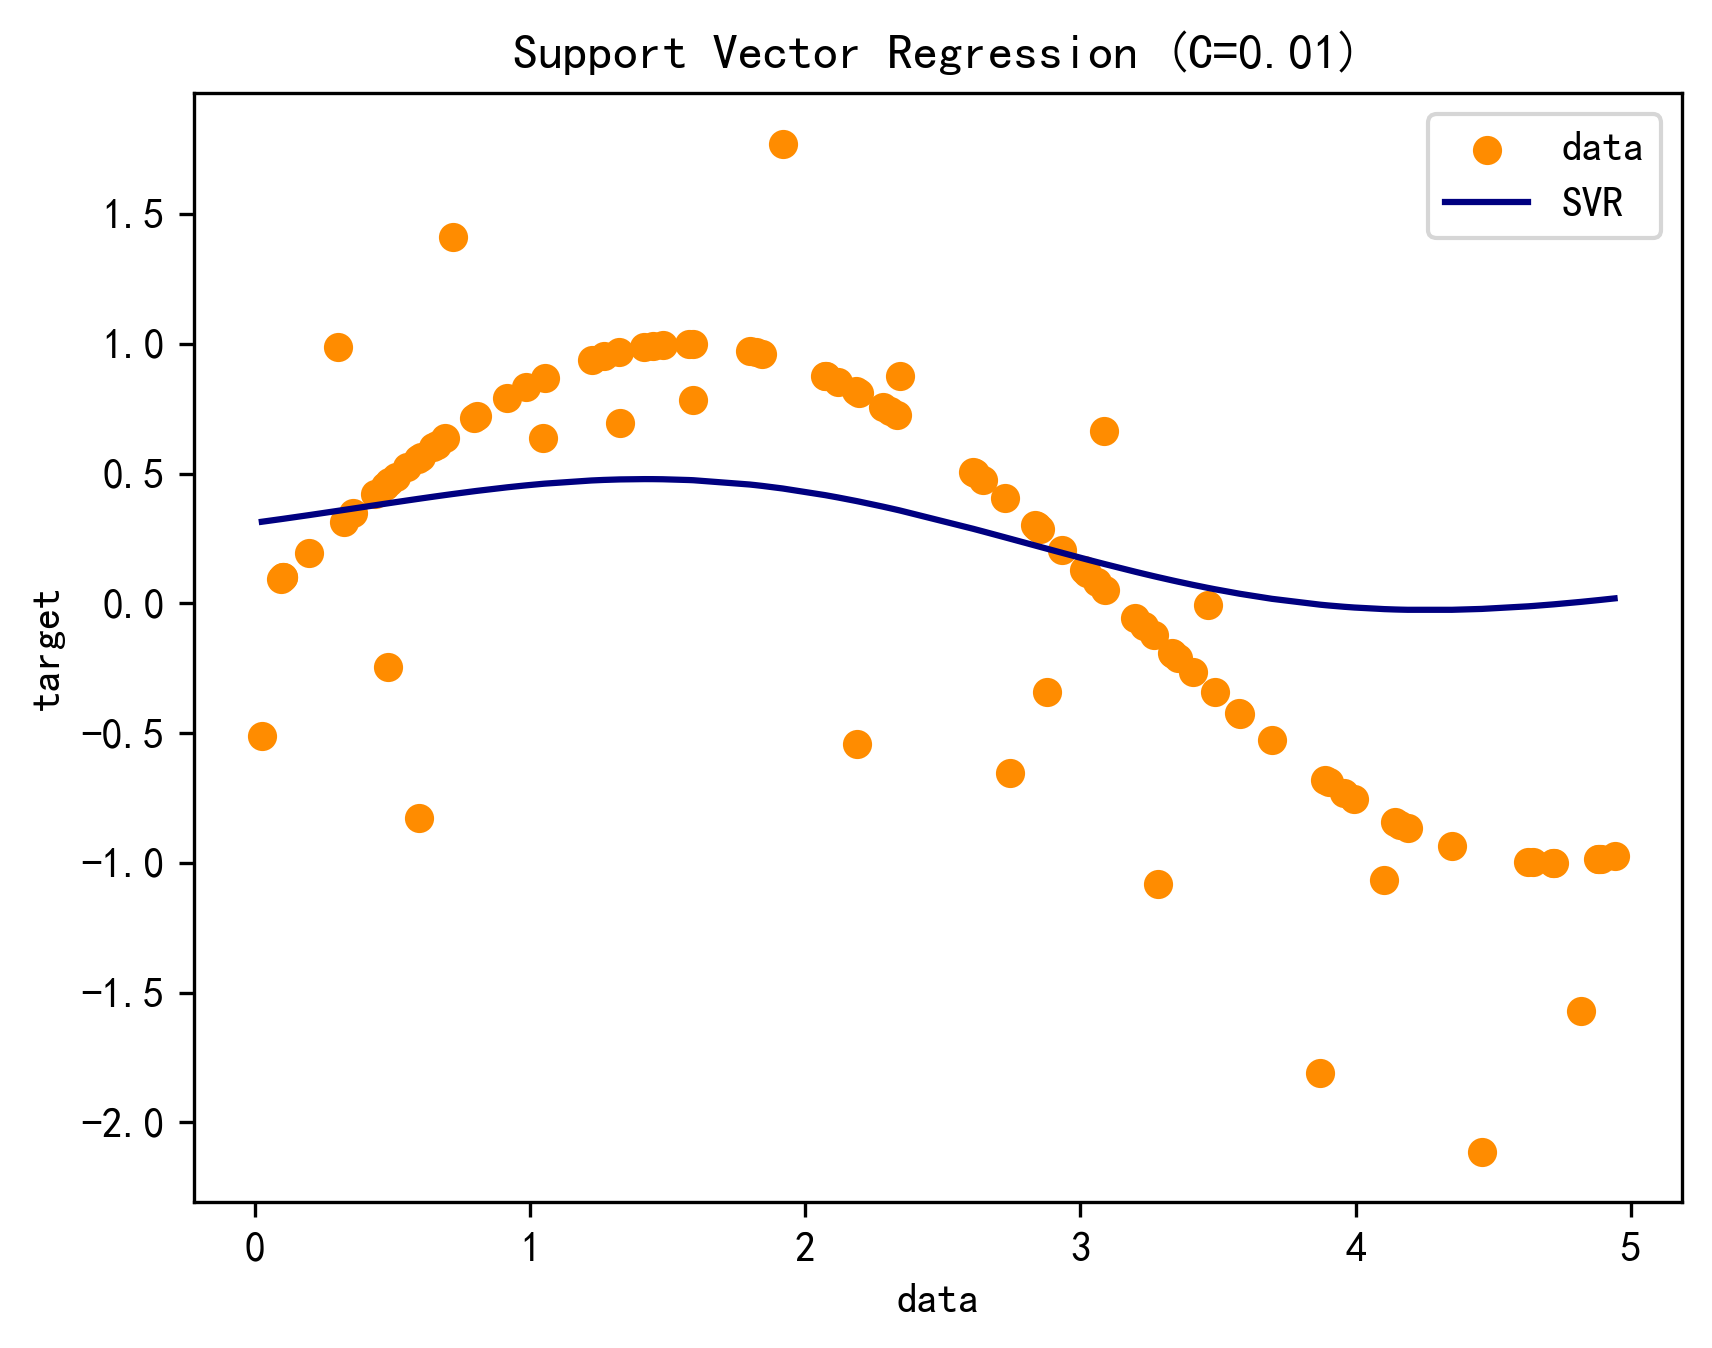

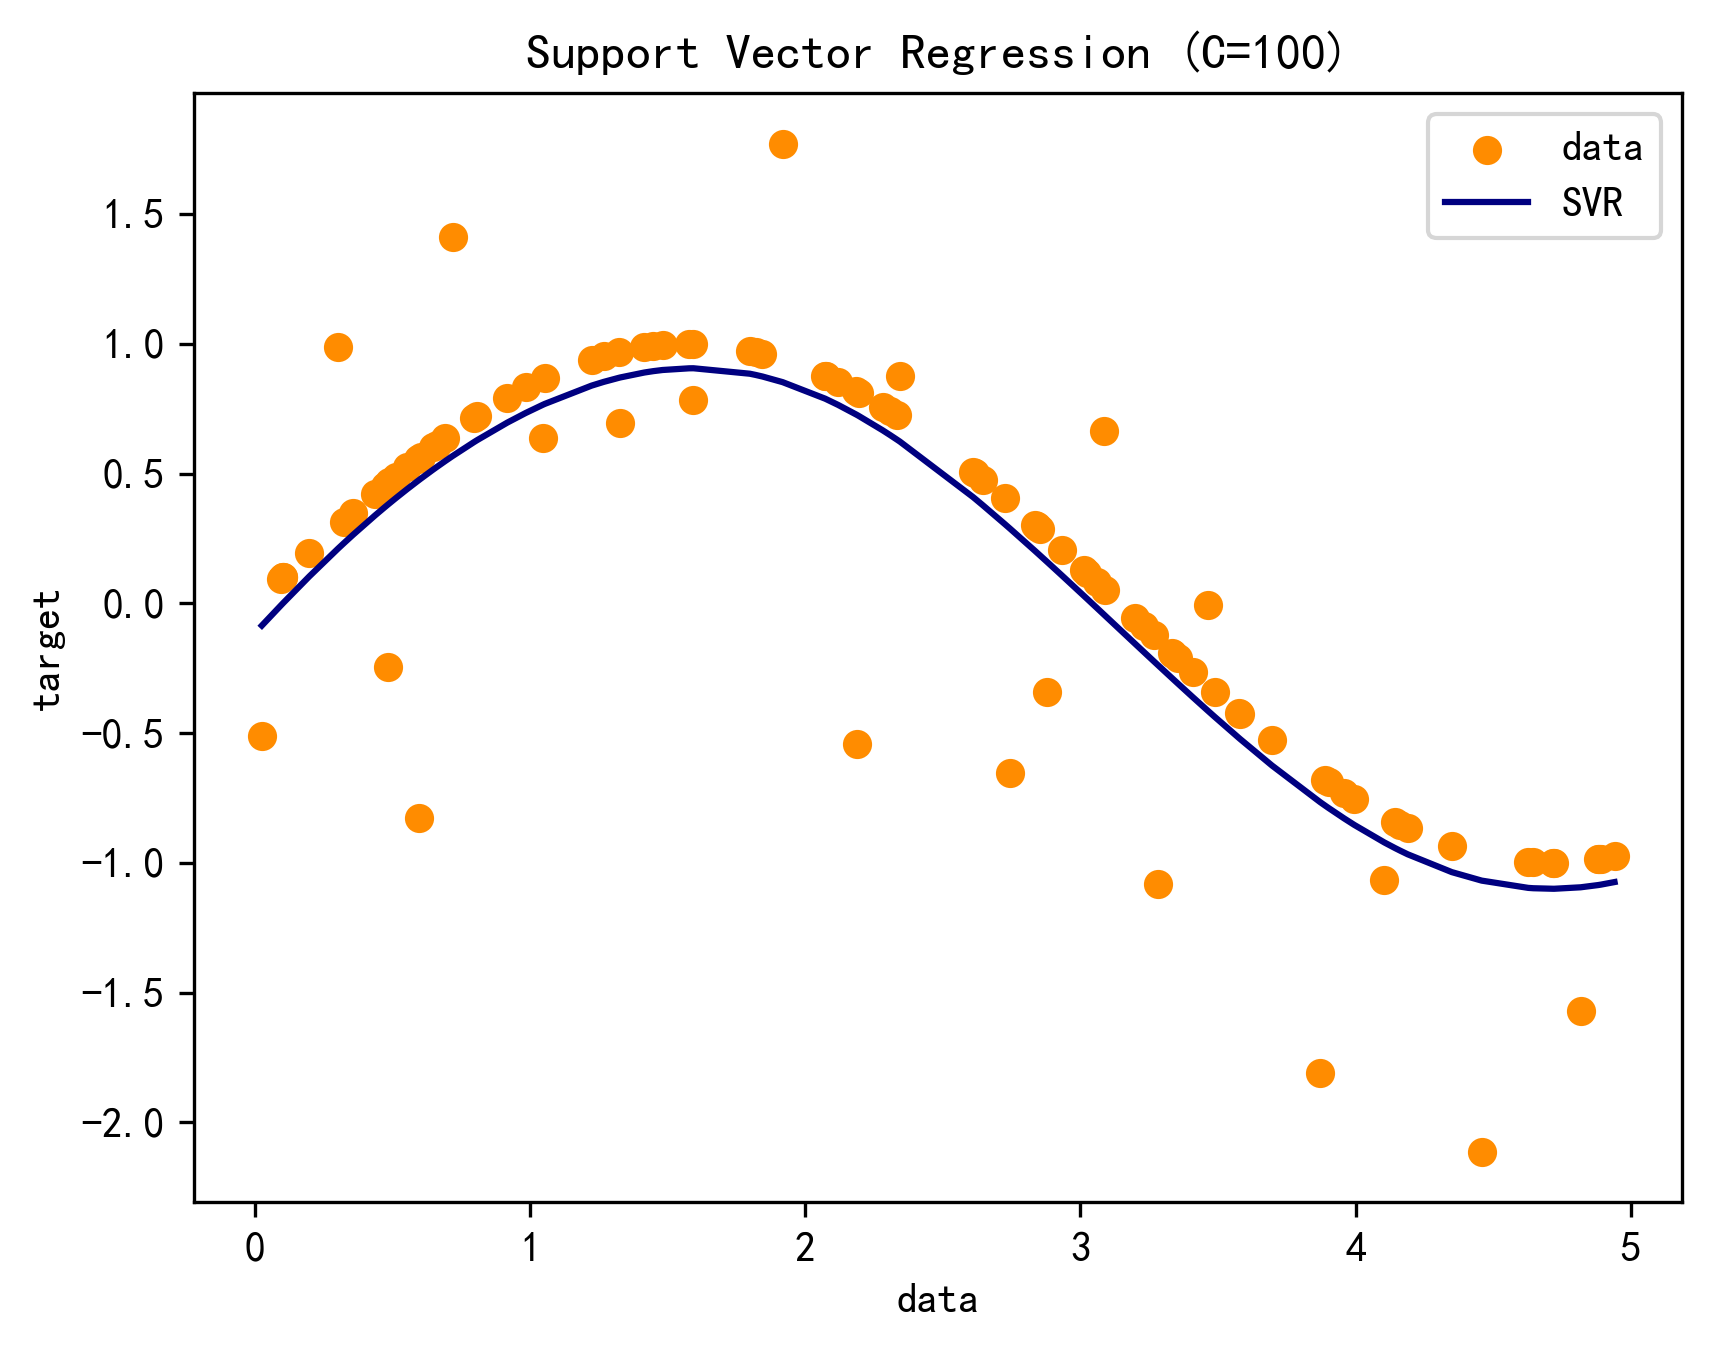

In [19]:
# 导入必要的库
import numpy as np  # 用于数值运算
import matplotlib.pyplot as plt  # 用于数据可视化
from sklearn import svm  # 从sklearn库导入svm模块

# 设置随机种子，保证每次运行生成相同的数据
np.random.seed(0)

# 生成随机数据
X = np.sort(5 * np.random.rand(100, 1), axis=0)  # 生成100个随机数，范围在0到5之间，并按升序排列
y = np.sin(X).ravel()  # 对X中的每个值计算正弦值，并展平为一维数组

# 添加噪声
y[::5] += 3 * (0.5 - np.random.rand(20))  # 每隔5个点增加一些噪声

# 定义不同的C值，C值是惩罚系数，控制对误分类样本的惩罚程度
C_values = [0.001, 0.01, 100]

# 循环遍历不同的C值
for C in C_values:
    # 创建支持向量机回归模型实例
    clf = svm.SVR(kernel='rbf', C=C)  # 使用高斯径向基核函数，C参数控制惩罚系数
    
    # 使用数据训练模型
    clf.fit(X, y)

    # 绘制原始数据点和模型预测的结果
    plt.figure(dpi=300)  # 创建一个新的图形窗口，dpi设置为300以提高清晰度
    plt.scatter(X, y, color='darkorange', label='data')  # 绘制原始数据点
    plt.plot(X, clf.predict(X), color='navy', label='SVR')  # 绘制SVR模型的预测曲线

    # 设置图形的标题、坐标轴标签和图例
    plt.xlabel('data')  # x轴标签
    plt.ylabel('target')  # y轴标签
    plt.title(f'Support Vector Regression (C={C})')  # 图形标题，其中{C}会被替换为当前循环中的C值
    plt.legend()  # 显示图例

    # 显示图形
    plt.show()

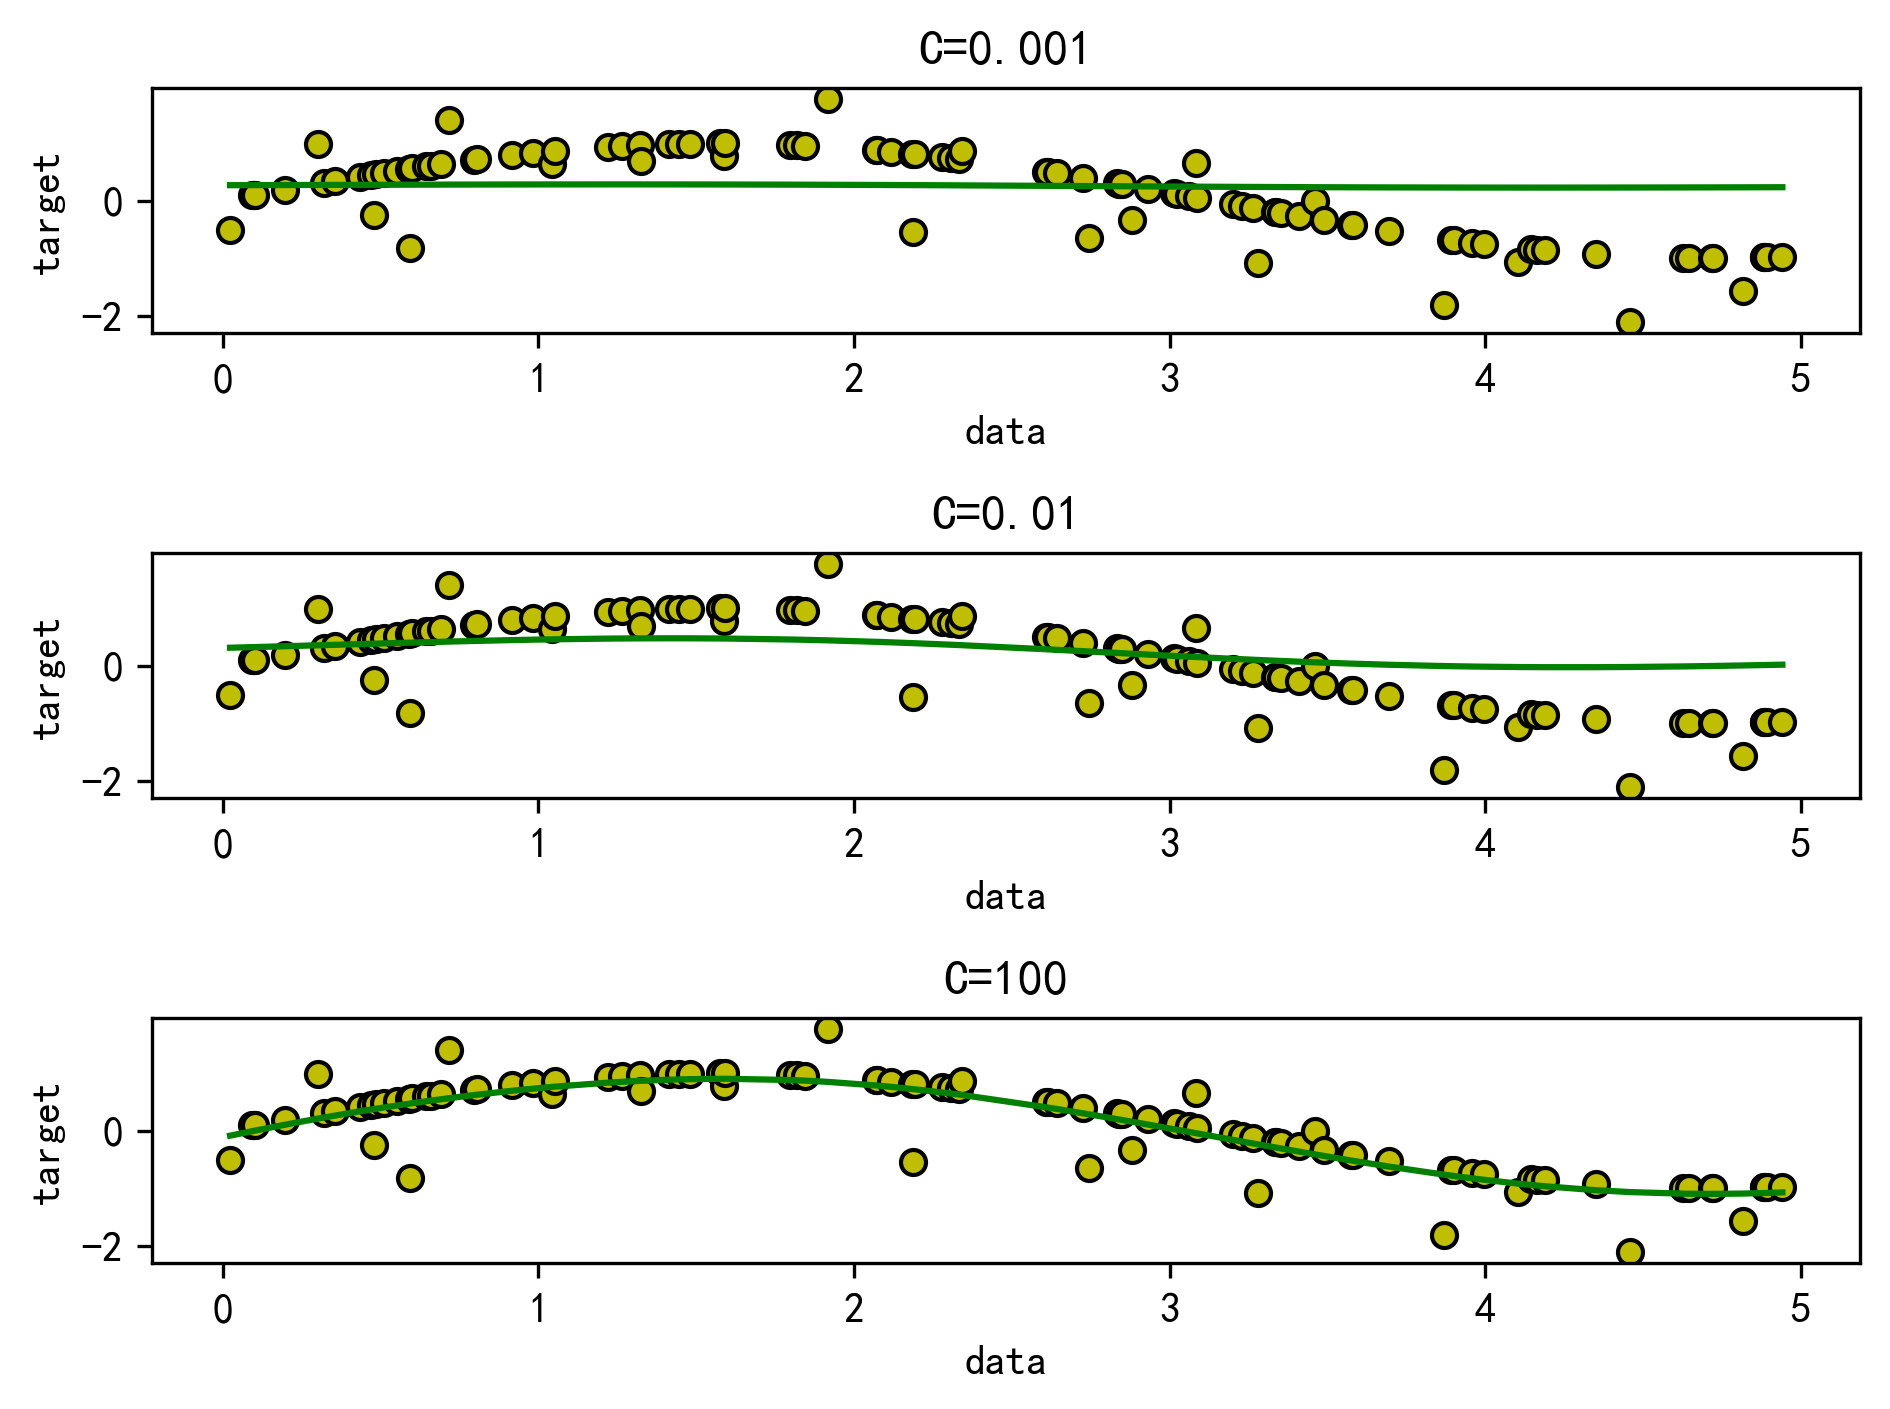

In [20]:
svrs = [
    SVR(kernel='rbf', C=0.001),
    SVR(kernel='rbf', C=0.01),
    SVR(kernel='rbf', C=100)
]
kernel_labels = ['C=0.001', 'C=0.01', 'C=100']
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=300)
for idx, svr in enumerate(svrs):
    y_fit = svr.fit(X, y).predict(X)
    axes[idx].scatter(X, y, c='y', label='data', edgecolor='k')
    axes[idx].plot(X, y_fit, c='g', label='SVR')
    axes[idx].set_xlabel('data')
    axes[idx].set_ylabel('target')
    axes[idx].set_title(kernel_labels[idx])
    #axes[idx].legend()
plt.tight_layout()
plt.savefig('figs/4-9.png', dpi=300)
plt.show()

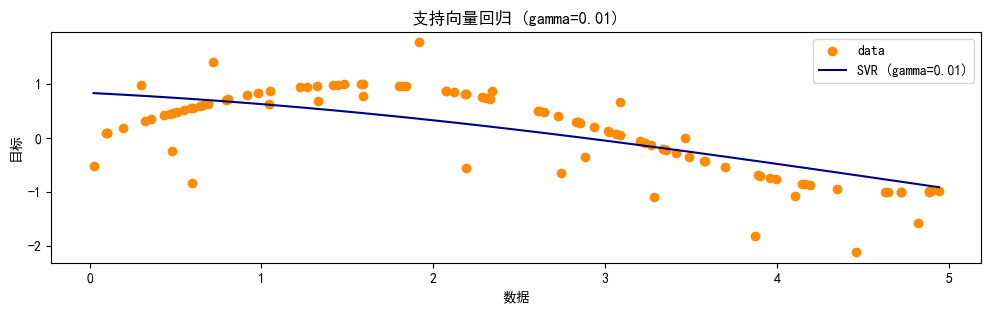

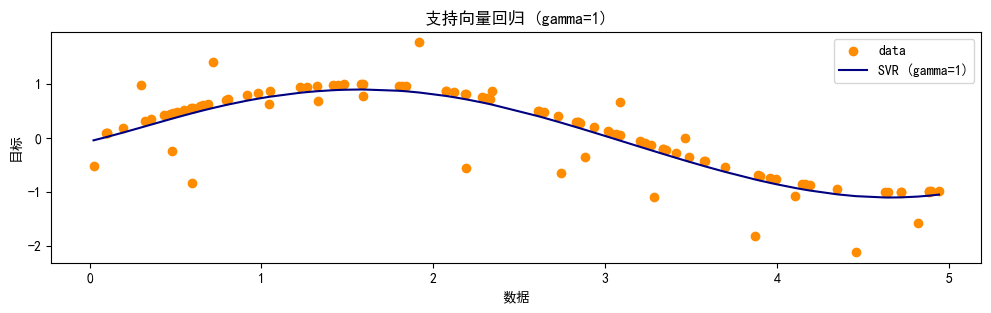

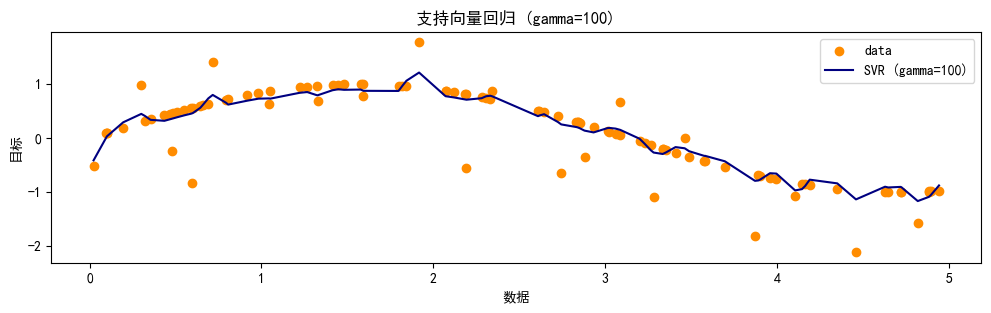

In [21]:
# 导入所需库
import numpy as np  # 用于科学计算
import matplotlib.pyplot as plt  # 用于数据可视化
from sklearn import svm  # 从sklearn库导入支持向量机模块

# 设置随机种子以保证结果可复现
np.random.seed(0)

# 生成随机数据
X = np.sort(5 * np.random.rand(100, 1), axis=0)  # 生成100个在0到5之间的随机数，并按升序排列
y = np.sin(X).ravel()  # 对X取正弦值，并展平数组

# 添加噪声
y[::5] += 3 * (0.5 - np.random.rand(20))  # 每隔5个数据点添加噪声

# 尝试不同的gamma值
gamma_values = [0.01, 1, 100]  # 不同的支持向量机核函数参数gamma

# 循环遍历不同的gamma值
for gamma in gamma_values:
    # 创建支持向量回归模型
    clf = svm.SVR(kernel='rbf', gamma=gamma)  # 使用径向基函数(RBF)作为核函数
    # 训练模型
    clf.fit(X, y)

    # 画出拟合曲线
    plt.figure(figsize=(12, 3))  # 创建一个宽12英寸高3英寸的图表
    plt.scatter(X, y, color='darkorange', label='data')  # 绘制原始数据点
    plt.plot(X, clf.predict(X), color='navy', label=f'SVR (gamma={gamma})')  # 绘制SVR模型预测曲线
    plt.xlabel('数据')  # 设置x轴标签
    plt.ylabel('目标')  # 设置y轴标签
    plt.title(f'支持向量回归 (gamma={gamma})')  # 设置图表标题
    plt.legend()  # 显示图例
    plt.show()  # 展示图表


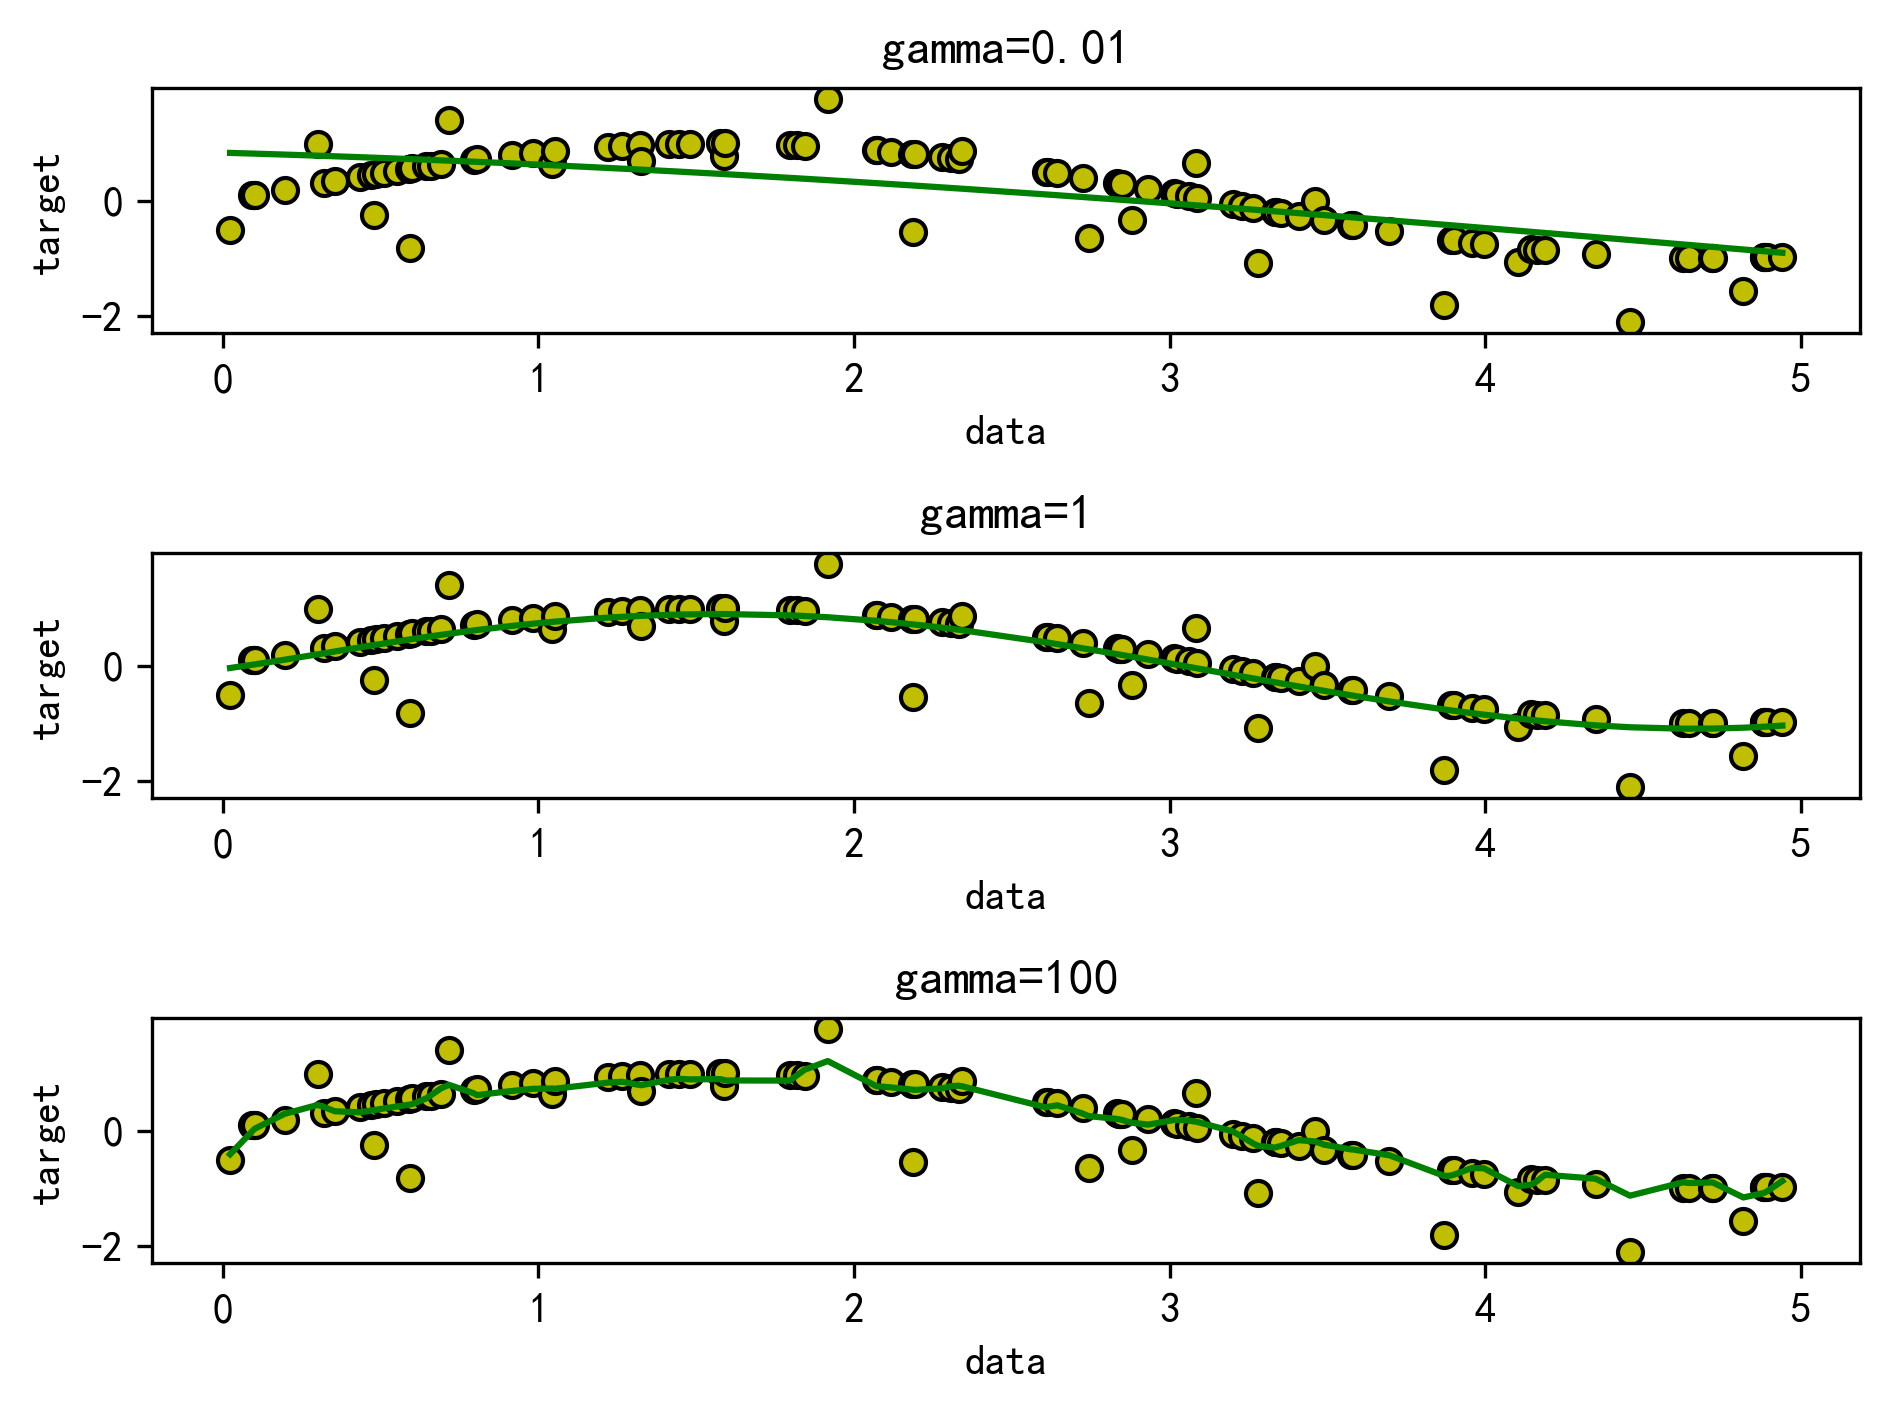

In [22]:
svrs = [
    SVR(kernel='rbf', gamma=0.01),
    SVR(kernel='rbf', gamma=1),
    SVR(kernel='rbf', gamma=100)
]
kernel_labels = ['gamma=0.01', 'gamma=1', 'gamma=100']
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=300)
for idx, svr in enumerate(svrs):
    y_fit = svr.fit(X, y).predict(X)
    axes[idx].scatter(X, y, c='y', label='data', edgecolor='k')
    axes[idx].plot(X, y_fit, c='g', label='SVR')
    axes[idx].set_xlabel('data')
    axes[idx].set_ylabel('target')
    axes[idx].set_title(kernel_labels[idx])
    #axes[idx].legend()
plt.tight_layout()
plt.savefig('figs/4-10.png', dpi=300)
plt.show()

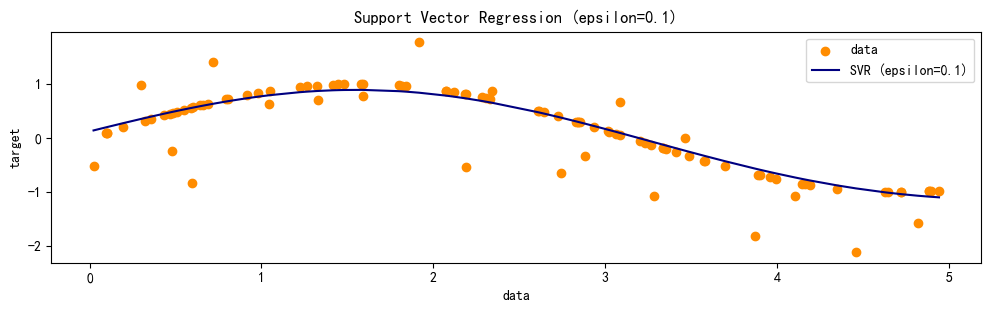

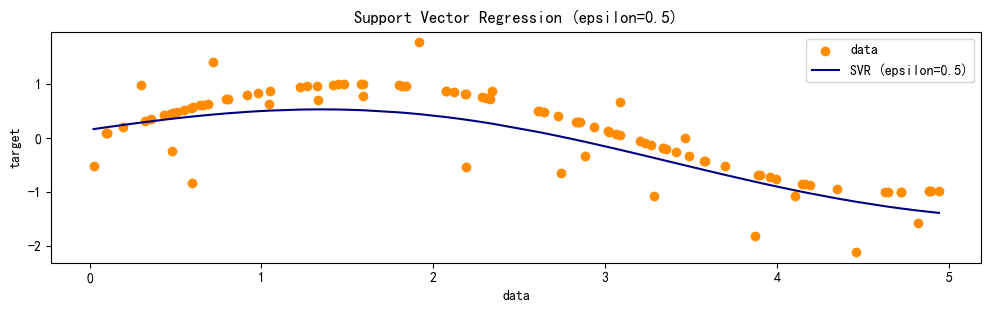

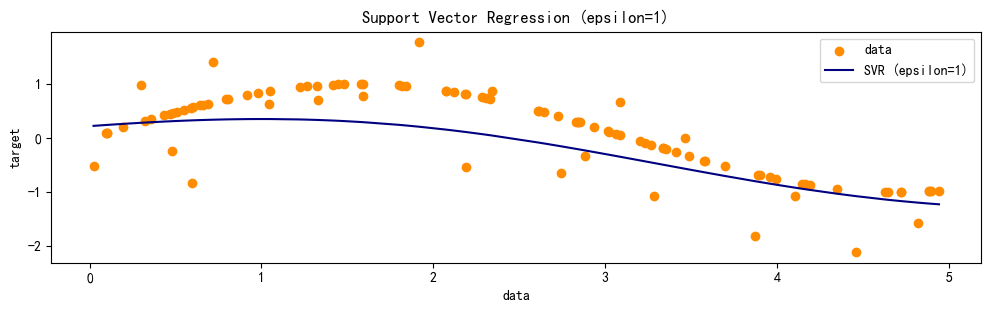

In [23]:
# 导入必要的库
import numpy as np  # 用于数值计算
import matplotlib.pyplot as plt  # 用于数据可视化
from sklearn import svm  # 从sklearn库导入支持向量机模块

# 设置随机种子以保证结果的可复现性
np.random.seed(0)

# 生成随机数据
X = np.sort(5 * np.random.rand(100, 1), axis=0)  # 生成100个在0到5之间的随机数，并按升序排列
y = np.sin(X).ravel()  # 对X取正弦值，并展平数组

# 添加噪声
y[::5] += 3 * (0.5 - np.random.rand(20))  # 每隔5个数据点添加噪声

# 尝试不同的epsilon值
epsilon_values = [0.1, 0.5, 1]  # 不同的支持向量回归模型的epsilon参数值

# 循环遍历不同的epsilon值
for epsilon in epsilon_values:
    # 创建支持向量回归模型
    clf = svm.SVR(kernel='rbf', gamma=0.1, epsilon=epsilon)  # 使用径向基函数(RBF)作为核函数，并设置epsilon值
    # 训练模型
    clf.fit(X, y)

    # 画出拟合曲线
    plt.figure(figsize=(12,3))  # 创建一个宽12英寸高3英寸的图表
    plt.scatter(X, y, color='darkorange', label='data')  # 绘制原始数据点
    plt.plot(X, clf.predict(X), color='navy', label=f'SVR (epsilon={epsilon})')  # 绘制SVR模型预测曲线
    plt.xlabel('data')  # 设置x轴标签
    plt.ylabel('target')  # 设置y轴标签
    plt.title(f'Support Vector Regression (epsilon={epsilon})')  # 设置图表标题
    plt.legend()  # 显示图例
    plt.show()  # 展示图表


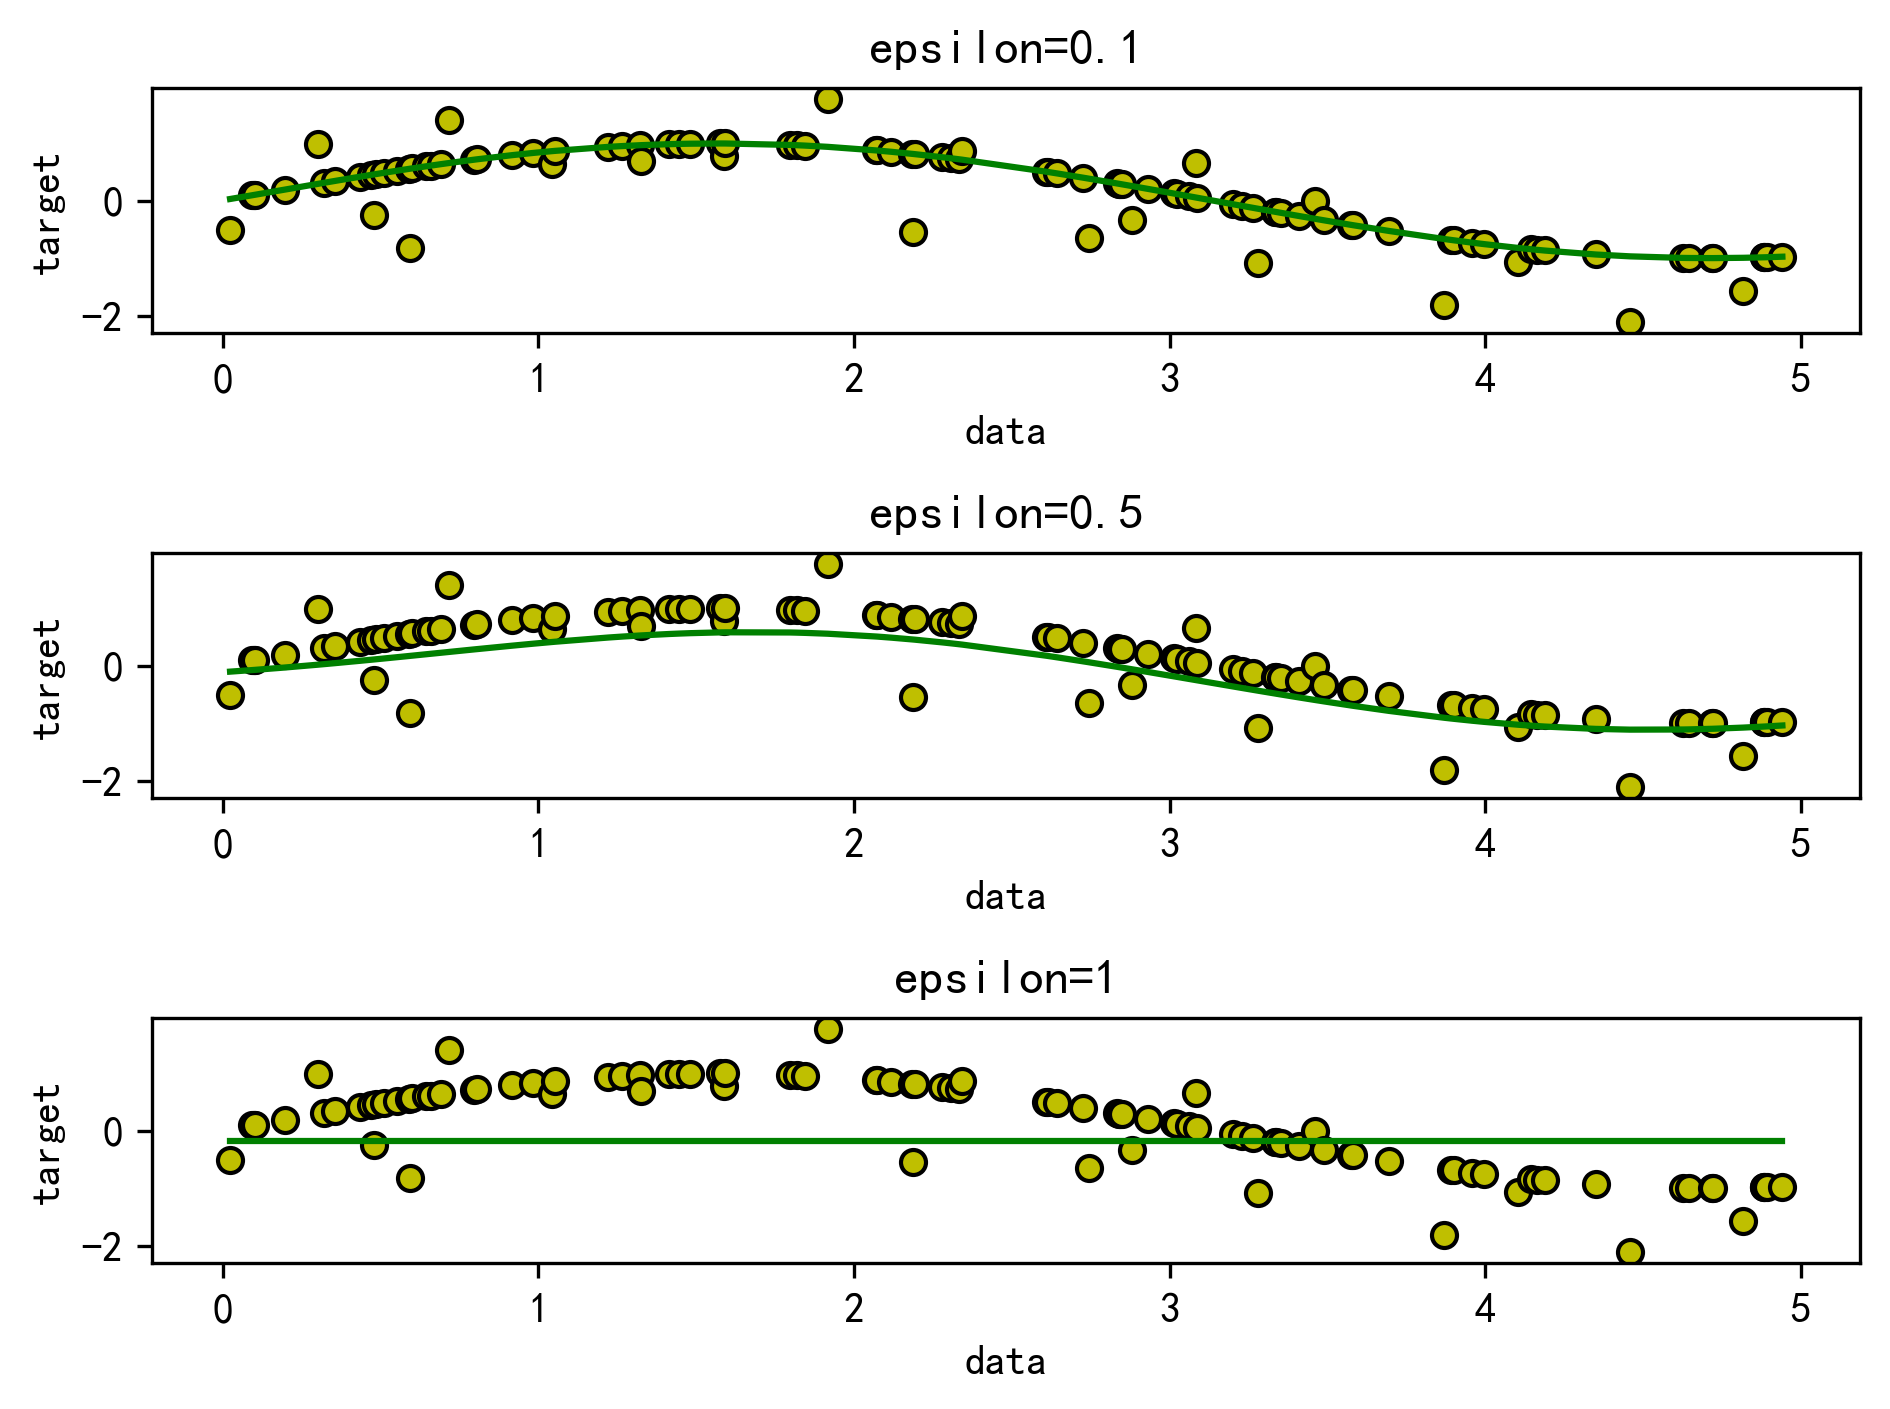

In [24]:
svrs = [
    SVR(kernel='rbf', epsilon=0.001),
    SVR(kernel='rbf', epsilon=1),
    SVR(kernel='rbf', epsilon=100)
]
kernel_labels = ['epsilon=0.1', 'epsilon=0.5', 'epsilon=1']
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=300)
for idx, svr in enumerate(svrs):
    y_fit = svr.fit(X, y).predict(X)
    axes[idx].scatter(X, y, c='y', label='data', edgecolor='k')
    axes[idx].plot(X, y_fit, c='g', label='SVR')
    axes[idx].set_xlabel('data')
    axes[idx].set_ylabel('target')
    axes[idx].set_title(kernel_labels[idx])
    #axes[idx].legend()
plt.tight_layout()
plt.savefig('figs/4-11.png', dpi=300)
plt.show()